In [16]:
##Logistic regression 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [18]:
#target column is 'survived' .which indicates wheather a passenger survived or not (1 for survived and 0 for not survived)
titanic_train_data=pd.read_csv(r"D:\Admin\Downloads\train.csv")
titanic_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
titanic_test_data=pd.read_csv(r'D:\Admin\Downloads\tt.csv')
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [28]:
titanic_train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [30]:
#ssome columns are not useful for prediction so we deleted that columns.
columns_to_drop=['PassengerId','Name','Ticket','Cabin']
titanic_train_data.drop(columns=columns_to_drop, inplace=True)
titanic_test_data.drop(columns=columns_to_drop, inplace=True)

KeyError: "['PassengerId', 'Name', 'Ticket', 'Cabin'] not found in axis"

In [ ]:
#1. Data Exploration:
#a. Load the dataset and perform exploratory data analysis (EDA).
#b. Examine the features, their types, and summary statistics.
#c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
#Analyze any patterns or correlations observed in the data.
titanic_train_data.describe()

In [ ]:
titanic_train_data.dtypes

In [ ]:
#2. Data Preprocessing:handling missing value
titanic_train_data.isnull().sum()

In [ ]:
titanic_test_data.isnull().sum()

In [ ]:
len(titanic_train_data)

In [31]:
len(titanic_test_data)

418

In [39]:
#Calculate the percentage of missig values in each column.
for i in titanic_train_data.isnull().sum():
    print((i/len(titanic_train_data))*100,'%')

0.0 %
0.0 %
0.0 %
19.865319865319865 %
0.0 %
0.0 %
0.0 %
0.22446689113355783 %


In [41]:
for i in titanic_test_data.isnull().sum():
    print((i/len(titanic_test_data))*100,'%')

0.0 %
0.0 %
0.0 %
0.0 %
20.574162679425836 %
0.0 %
0.0 %
0.0 %
0.23923444976076555 %
78.22966507177034 %
0.0 %


In [43]:
titanic_train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [45]:
titanic_test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [47]:
Embarked_mode=titanic_train_data['Embarked'].mode()[0]
Embarked_mode

'S'

In [49]:
Age_median = titanic_train_data['Age'].median()
Age_median

28.0

In [51]:
Age_median = titanic_test_data['Age'].median()
Age_median

27.0

In [53]:
Fare_median = titanic_test_data['Fare'].median()
Fare_median

14.4542

In [55]:
titanic_train_data['Age'].fillna(Age_median, inplace=True)

In [57]:
titanic_test_data['Age'].fillna(Age_median, inplace=True)

In [59]:
titanic_test_data['Fare'].fillna(Fare_median, inplace=True)

In [61]:
titanic_train_data['Embarked'].fillna(Embarked_mode, inplace=True)

In [63]:
titanic_train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [65]:
titanic_test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

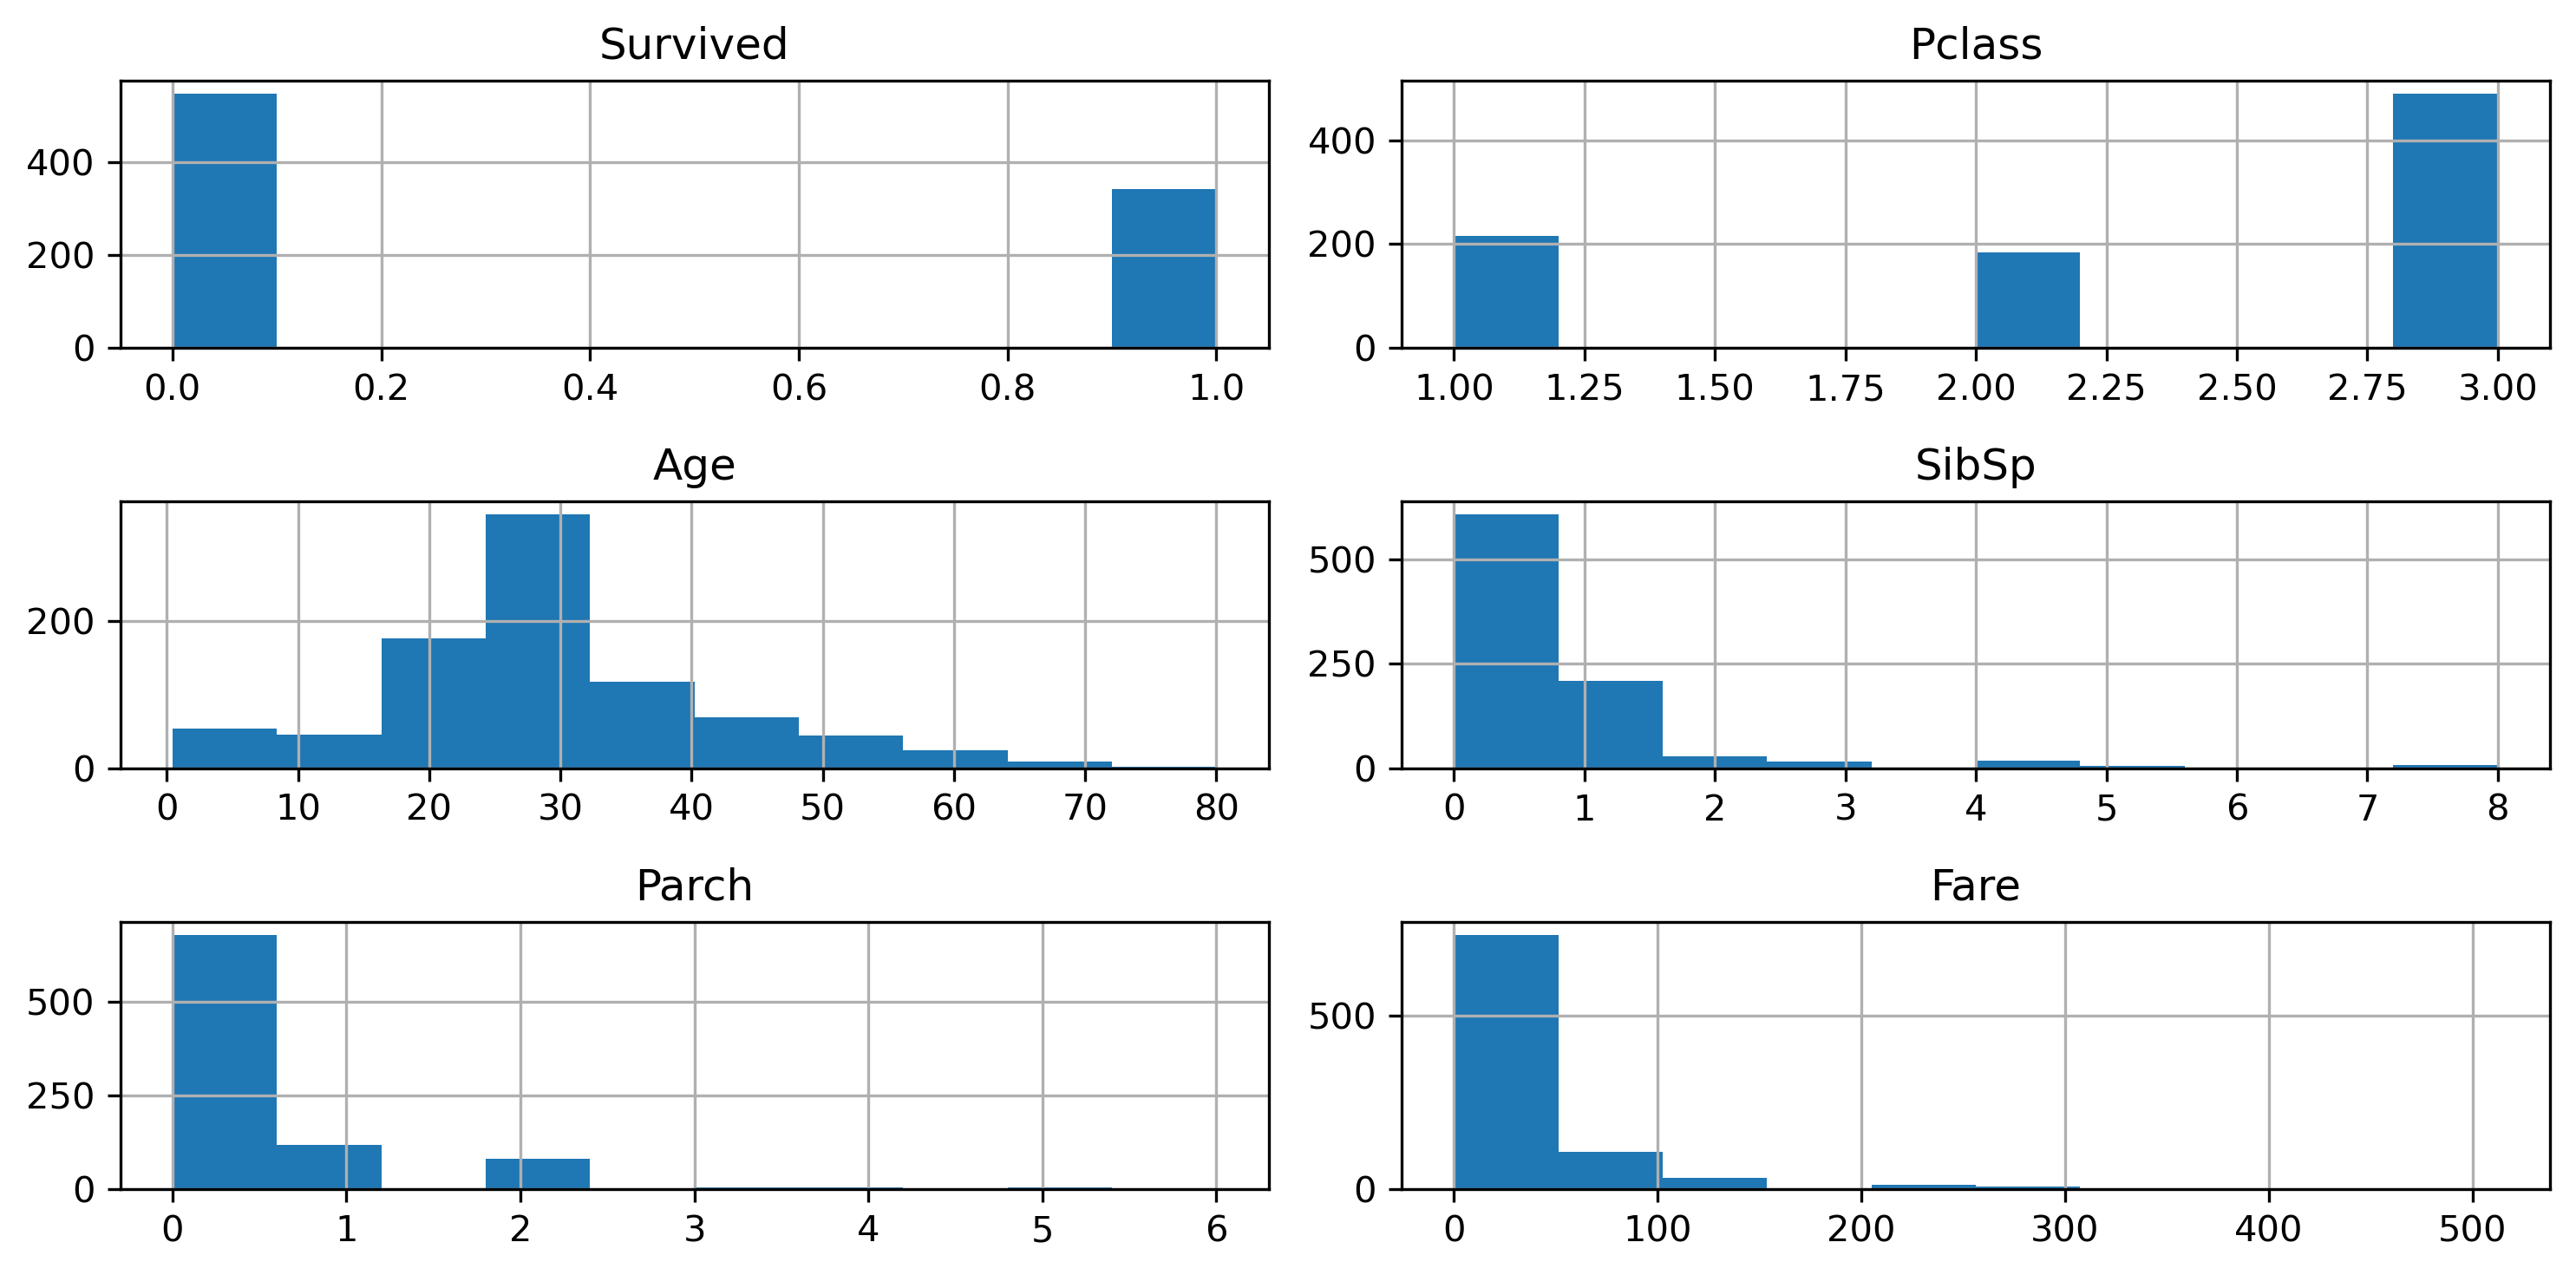

In [67]:
#outlier detection
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
titanic_train_data.hist()
plt.tight_layout()

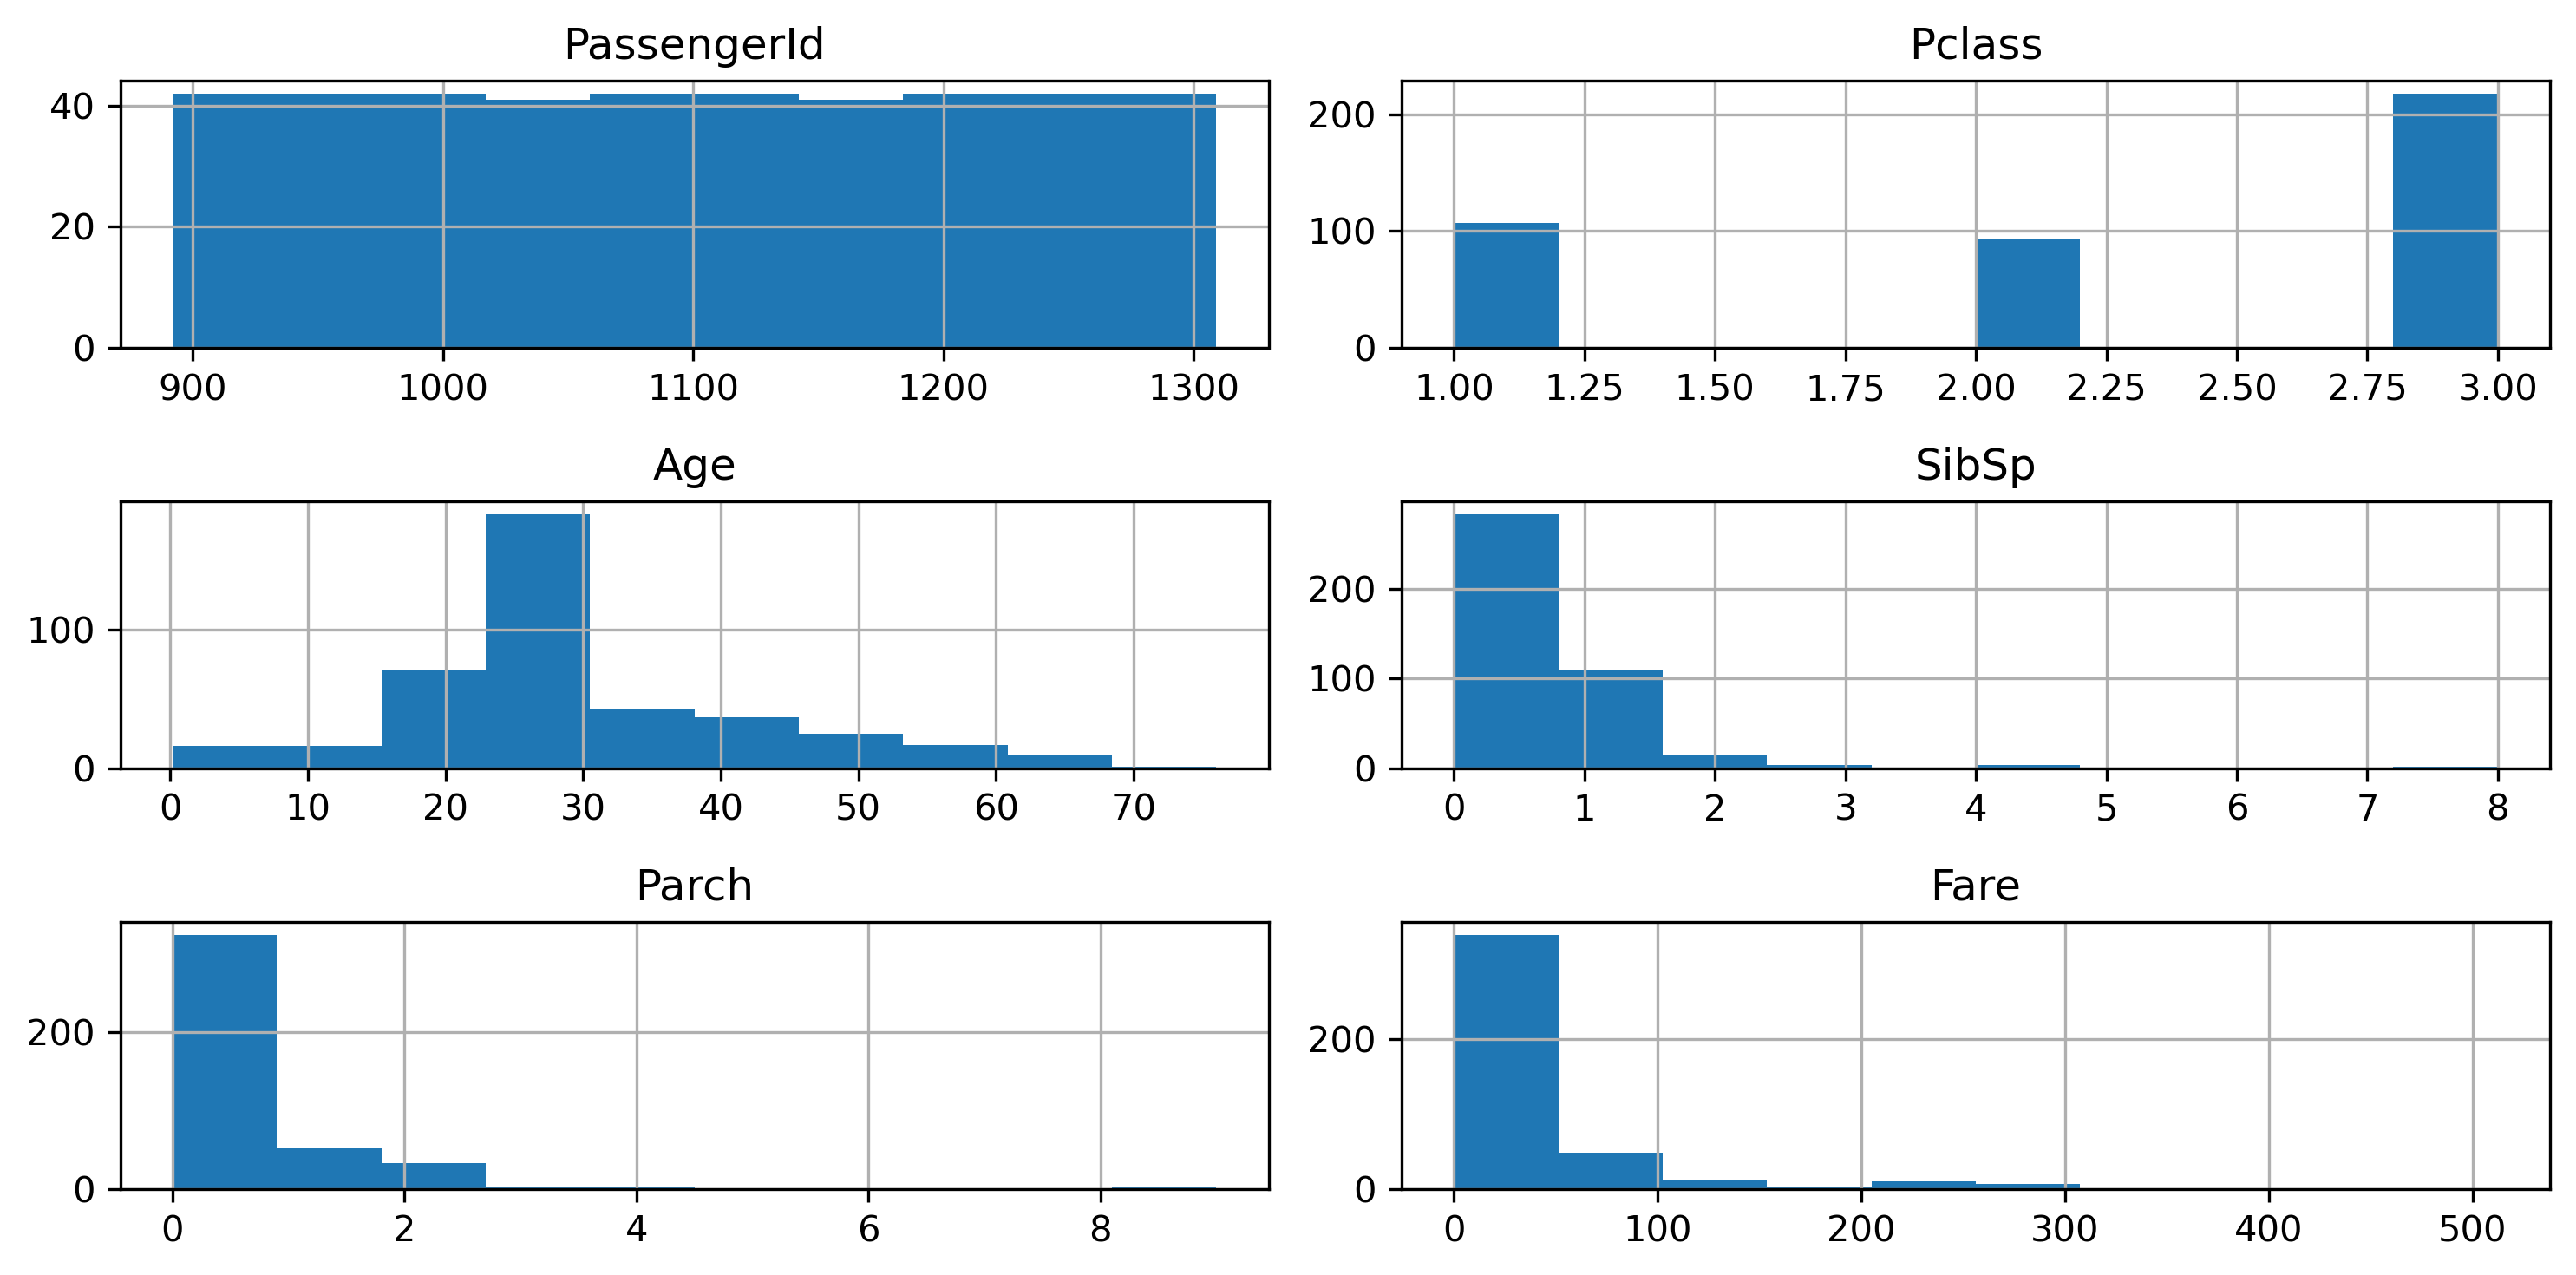

In [68]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
titanic_test_data.hist()
plt.tight_layout()

<Axes: >

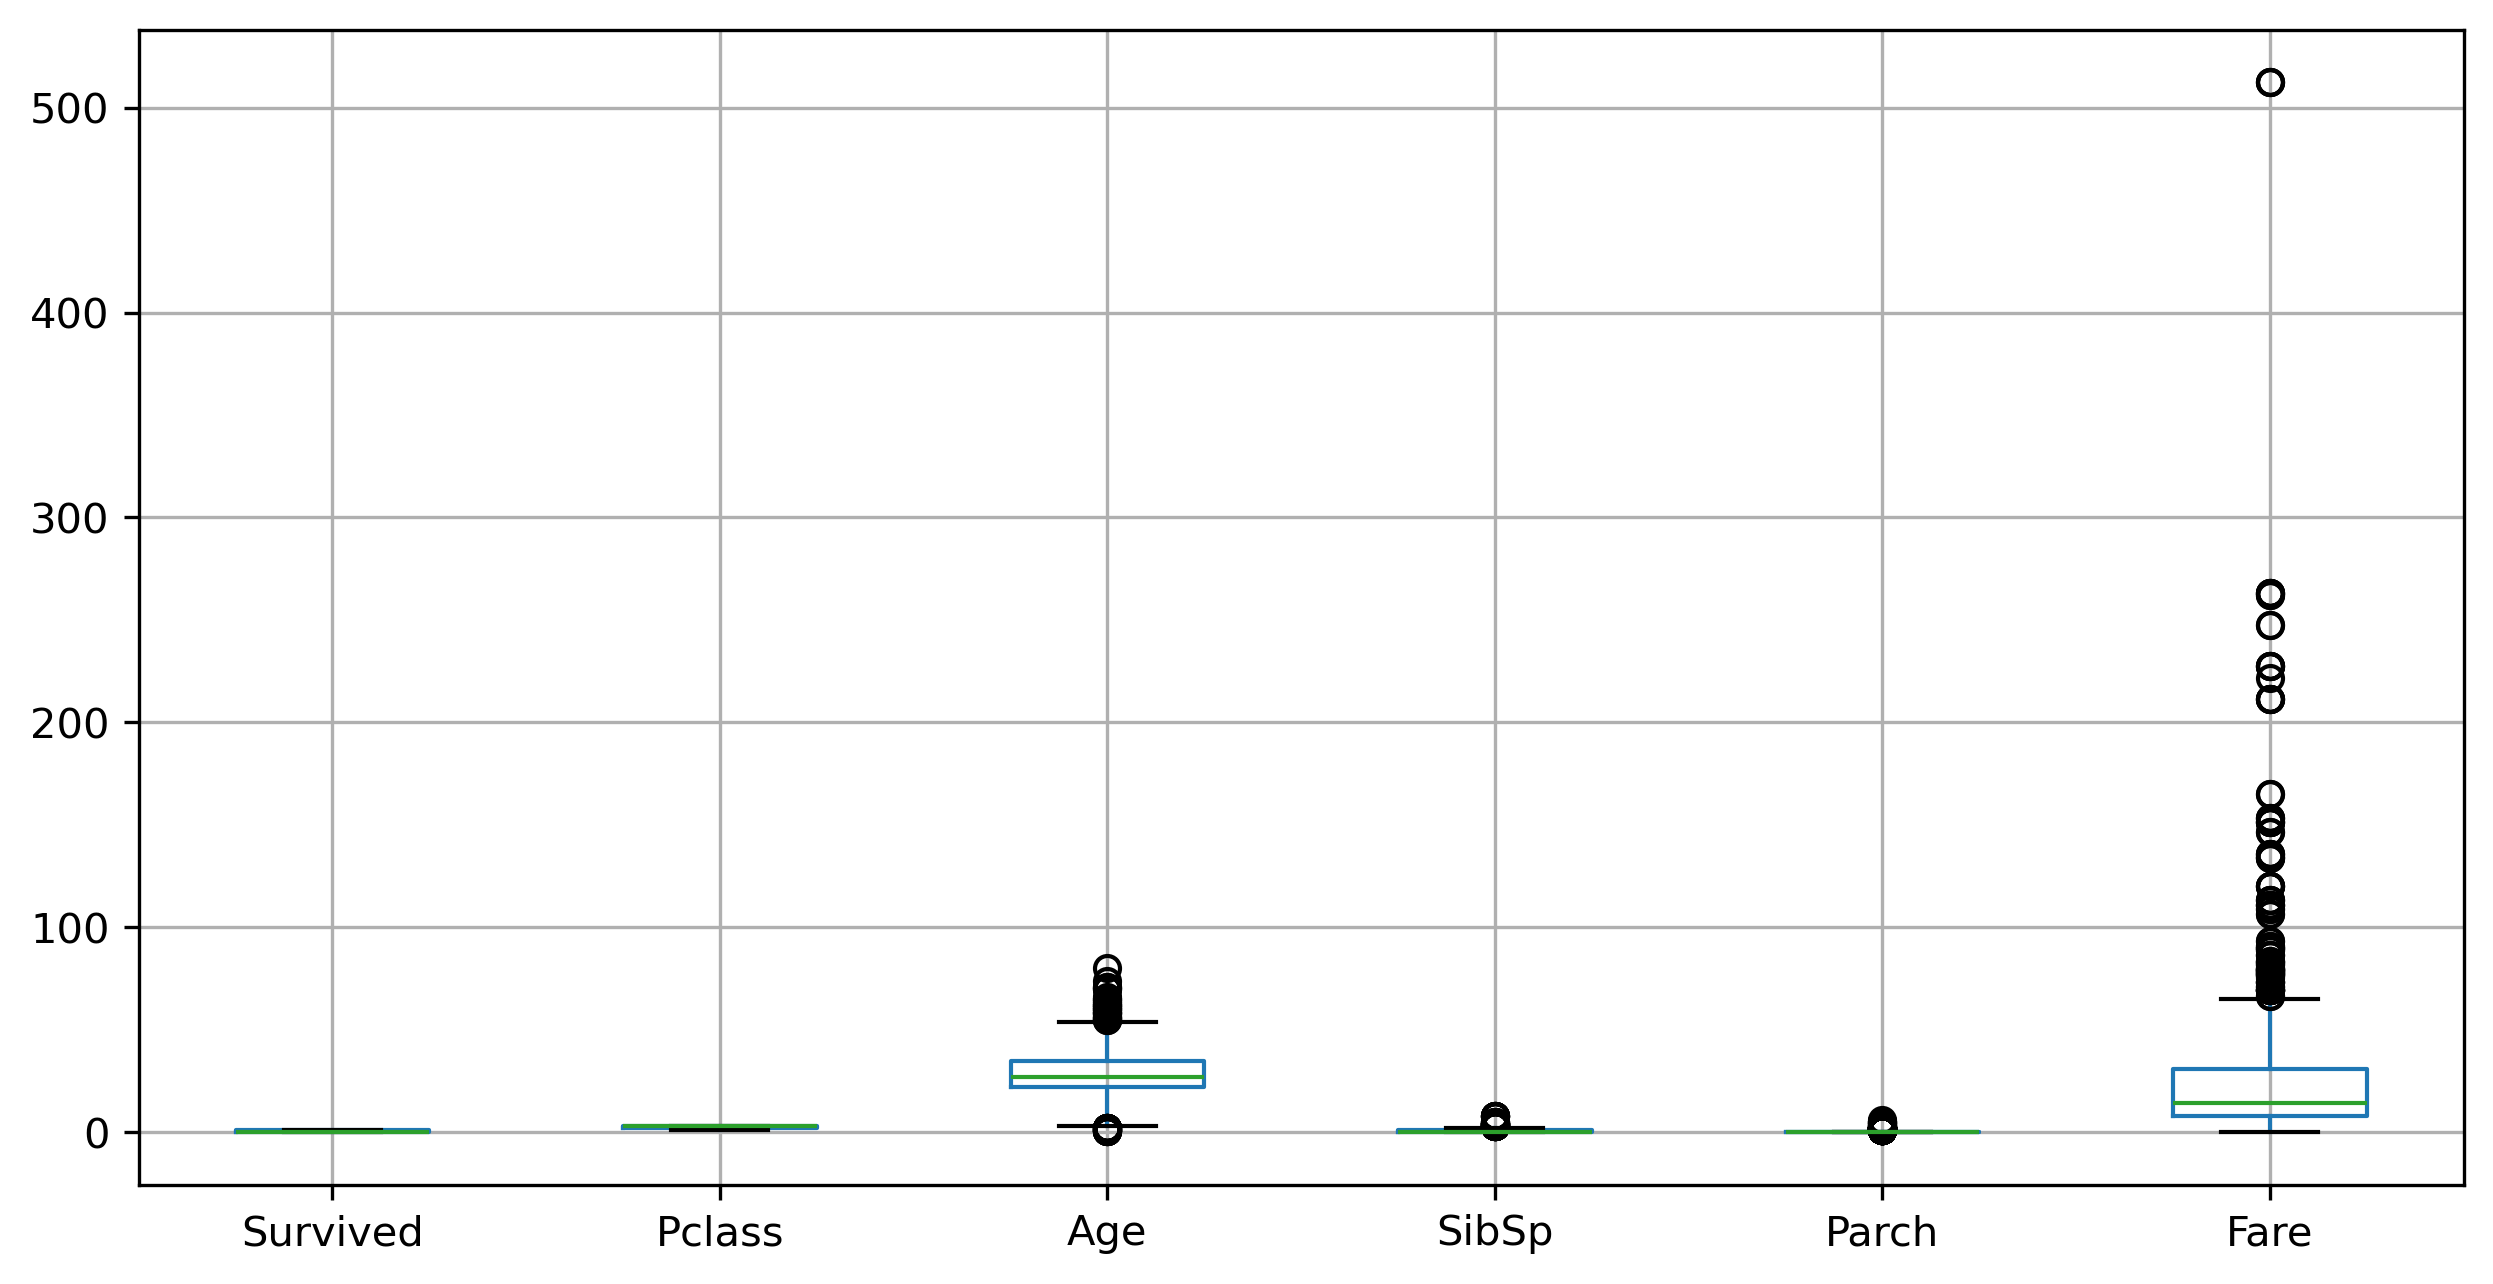

In [69]:
titanic_train_data.boxplot()

<Axes: >

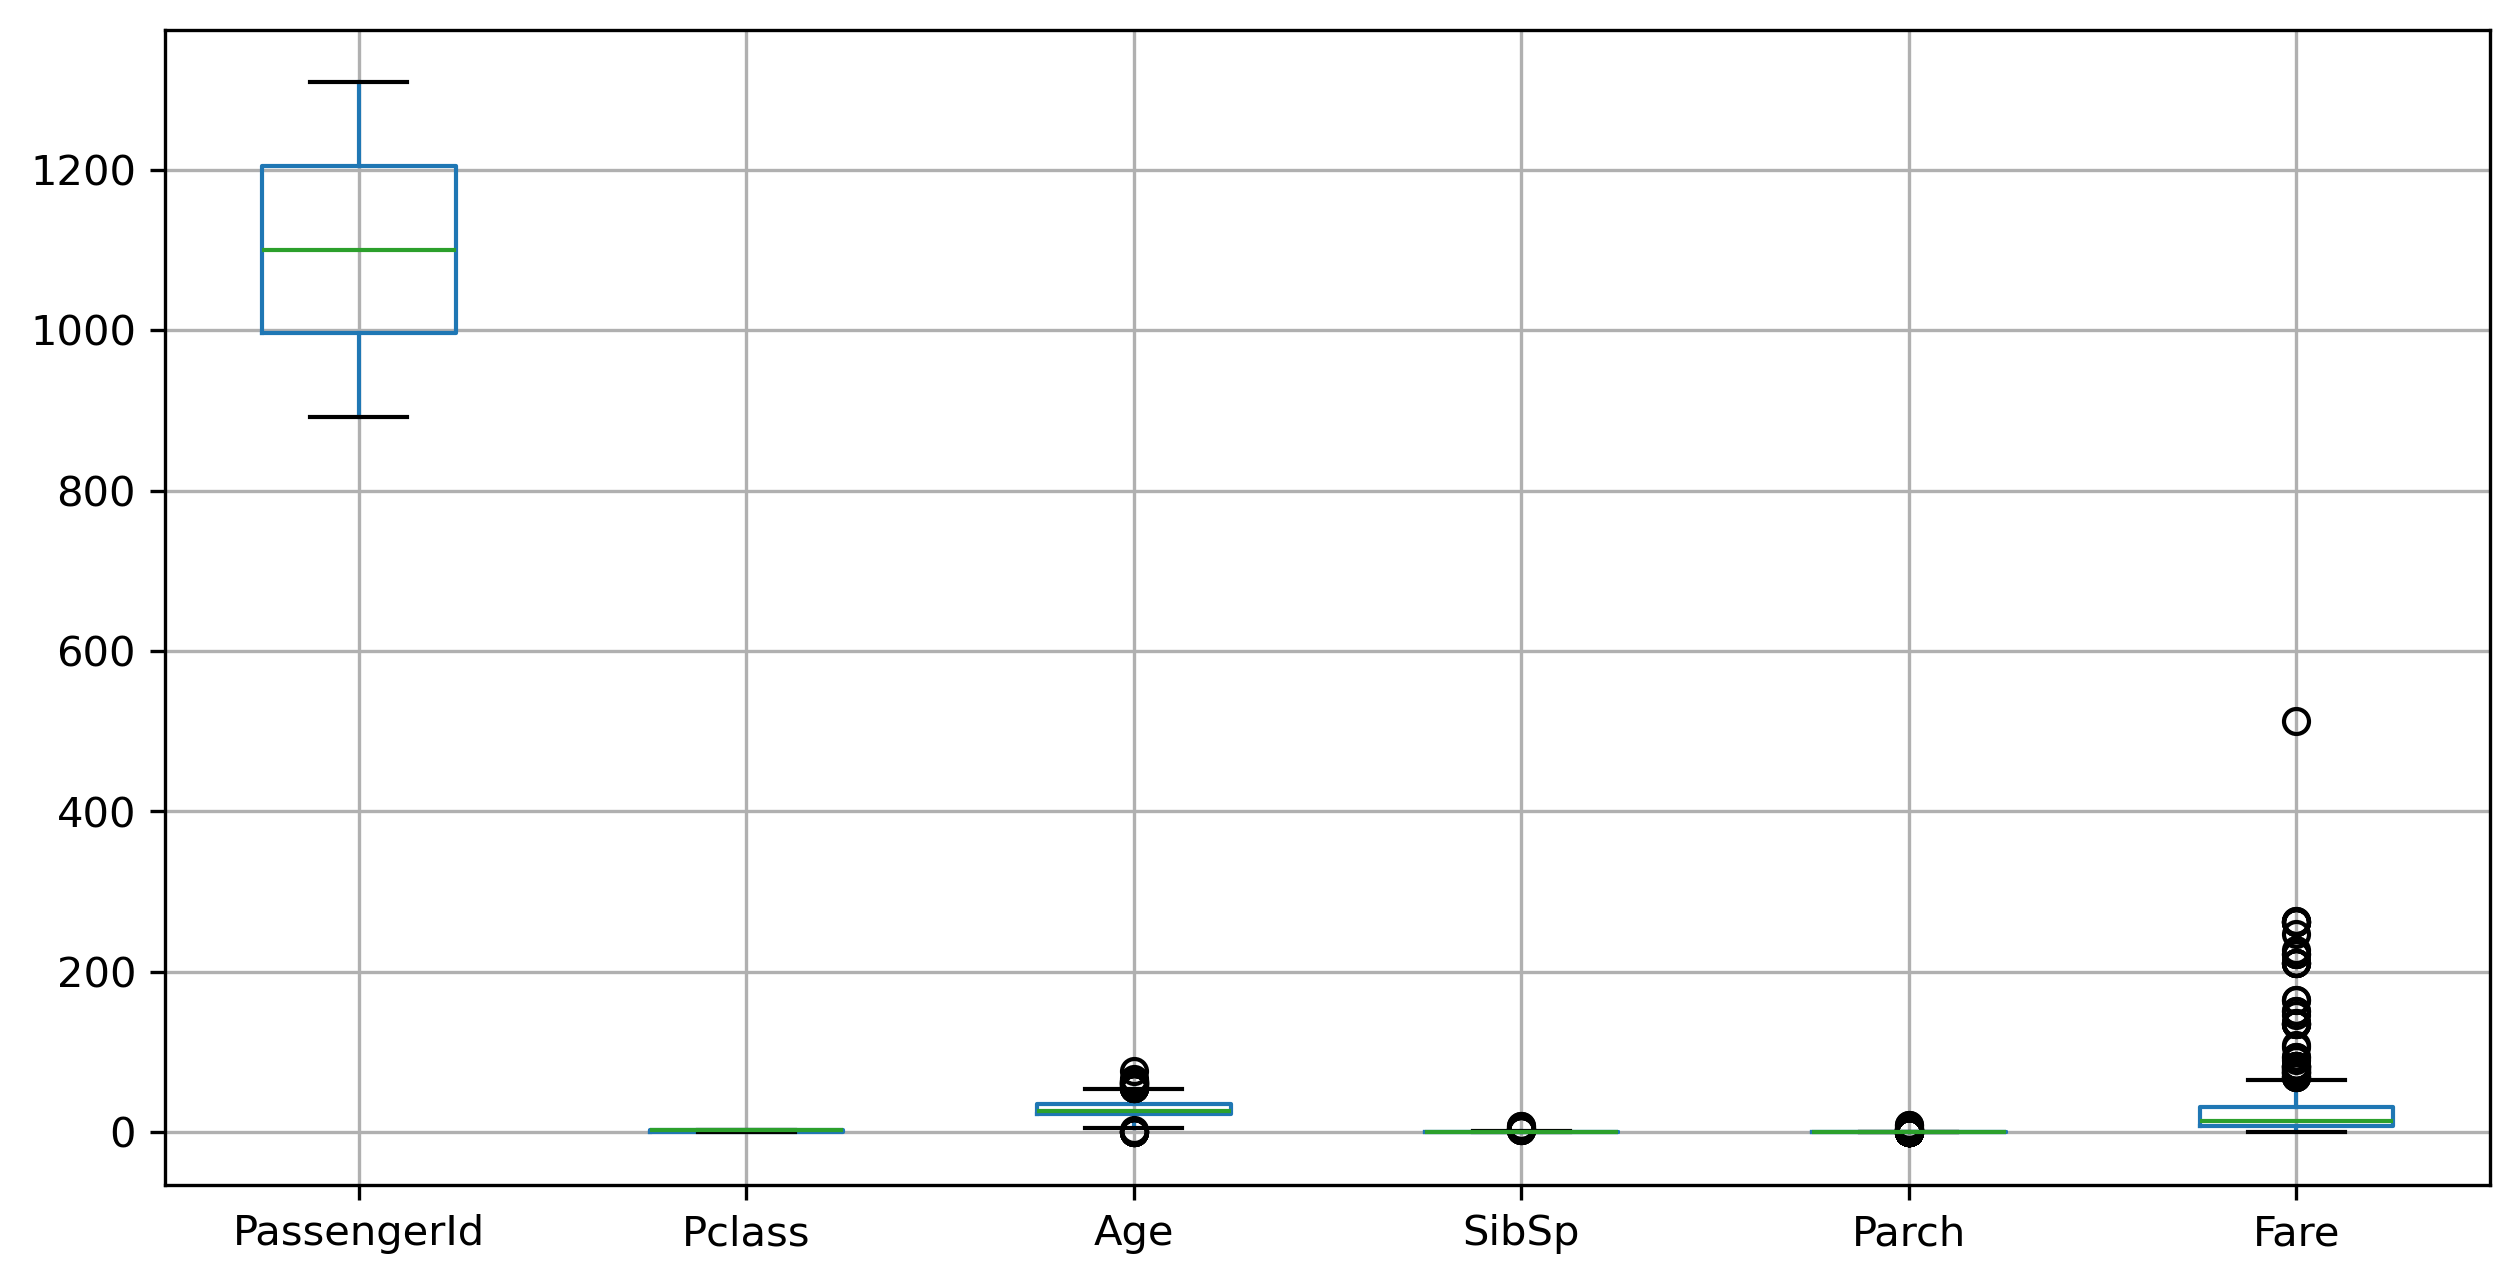

In [71]:
titanic_test_data.boxplot()

In [72]:
def outlier_detection(data, columns):
    
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        titanic_train_data[col] = np.where(titanic_train_data[col] > upper, upper, np.where(titanic_train_data[col] < lower, lower,titanic_train_data[col]))

In [74]:
def outlier_detection(data, columns):
    
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        titanic_test_data[col] = np.where(titanic_test_data[col] > upper, upper, np.where(titanic_test_data[col] < lower, lower,titanic_test_data[col]))

In [79]:
titanic_train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [81]:
titanic_test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [83]:
titanic_train_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [85]:
titanic_test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [87]:
#temparary we drop these columns for outlier detection
titanic_train_data.drop(columns=['Sex','Embarked']).columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [89]:
#temparary we drop these columns for outlier detection
titanic_test_data.drop(columns=['Sex','Embarked']).columns

Index(['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin'],
      dtype='object')

In [91]:
outlier_detection(titanic_train_data,titanic_train_data.drop(columns=['Sex','Embarked']).columns)

KeyError: 'Survived'

In [93]:
outlier_detection(titanic_test_data,titanic_test_data.drop(columns=['Sex','Embarked']).columns)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
titanic_train_data.boxplot()

In [ ]:
titanic_test_data.boxplot()

In [ ]:
#scatter and correlation
titanic_train_data.head()

In [98]:
titanic_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892.0,3.0,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894.0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895.0,3.0,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: xlabel='Pclass', ylabel='Fare'>

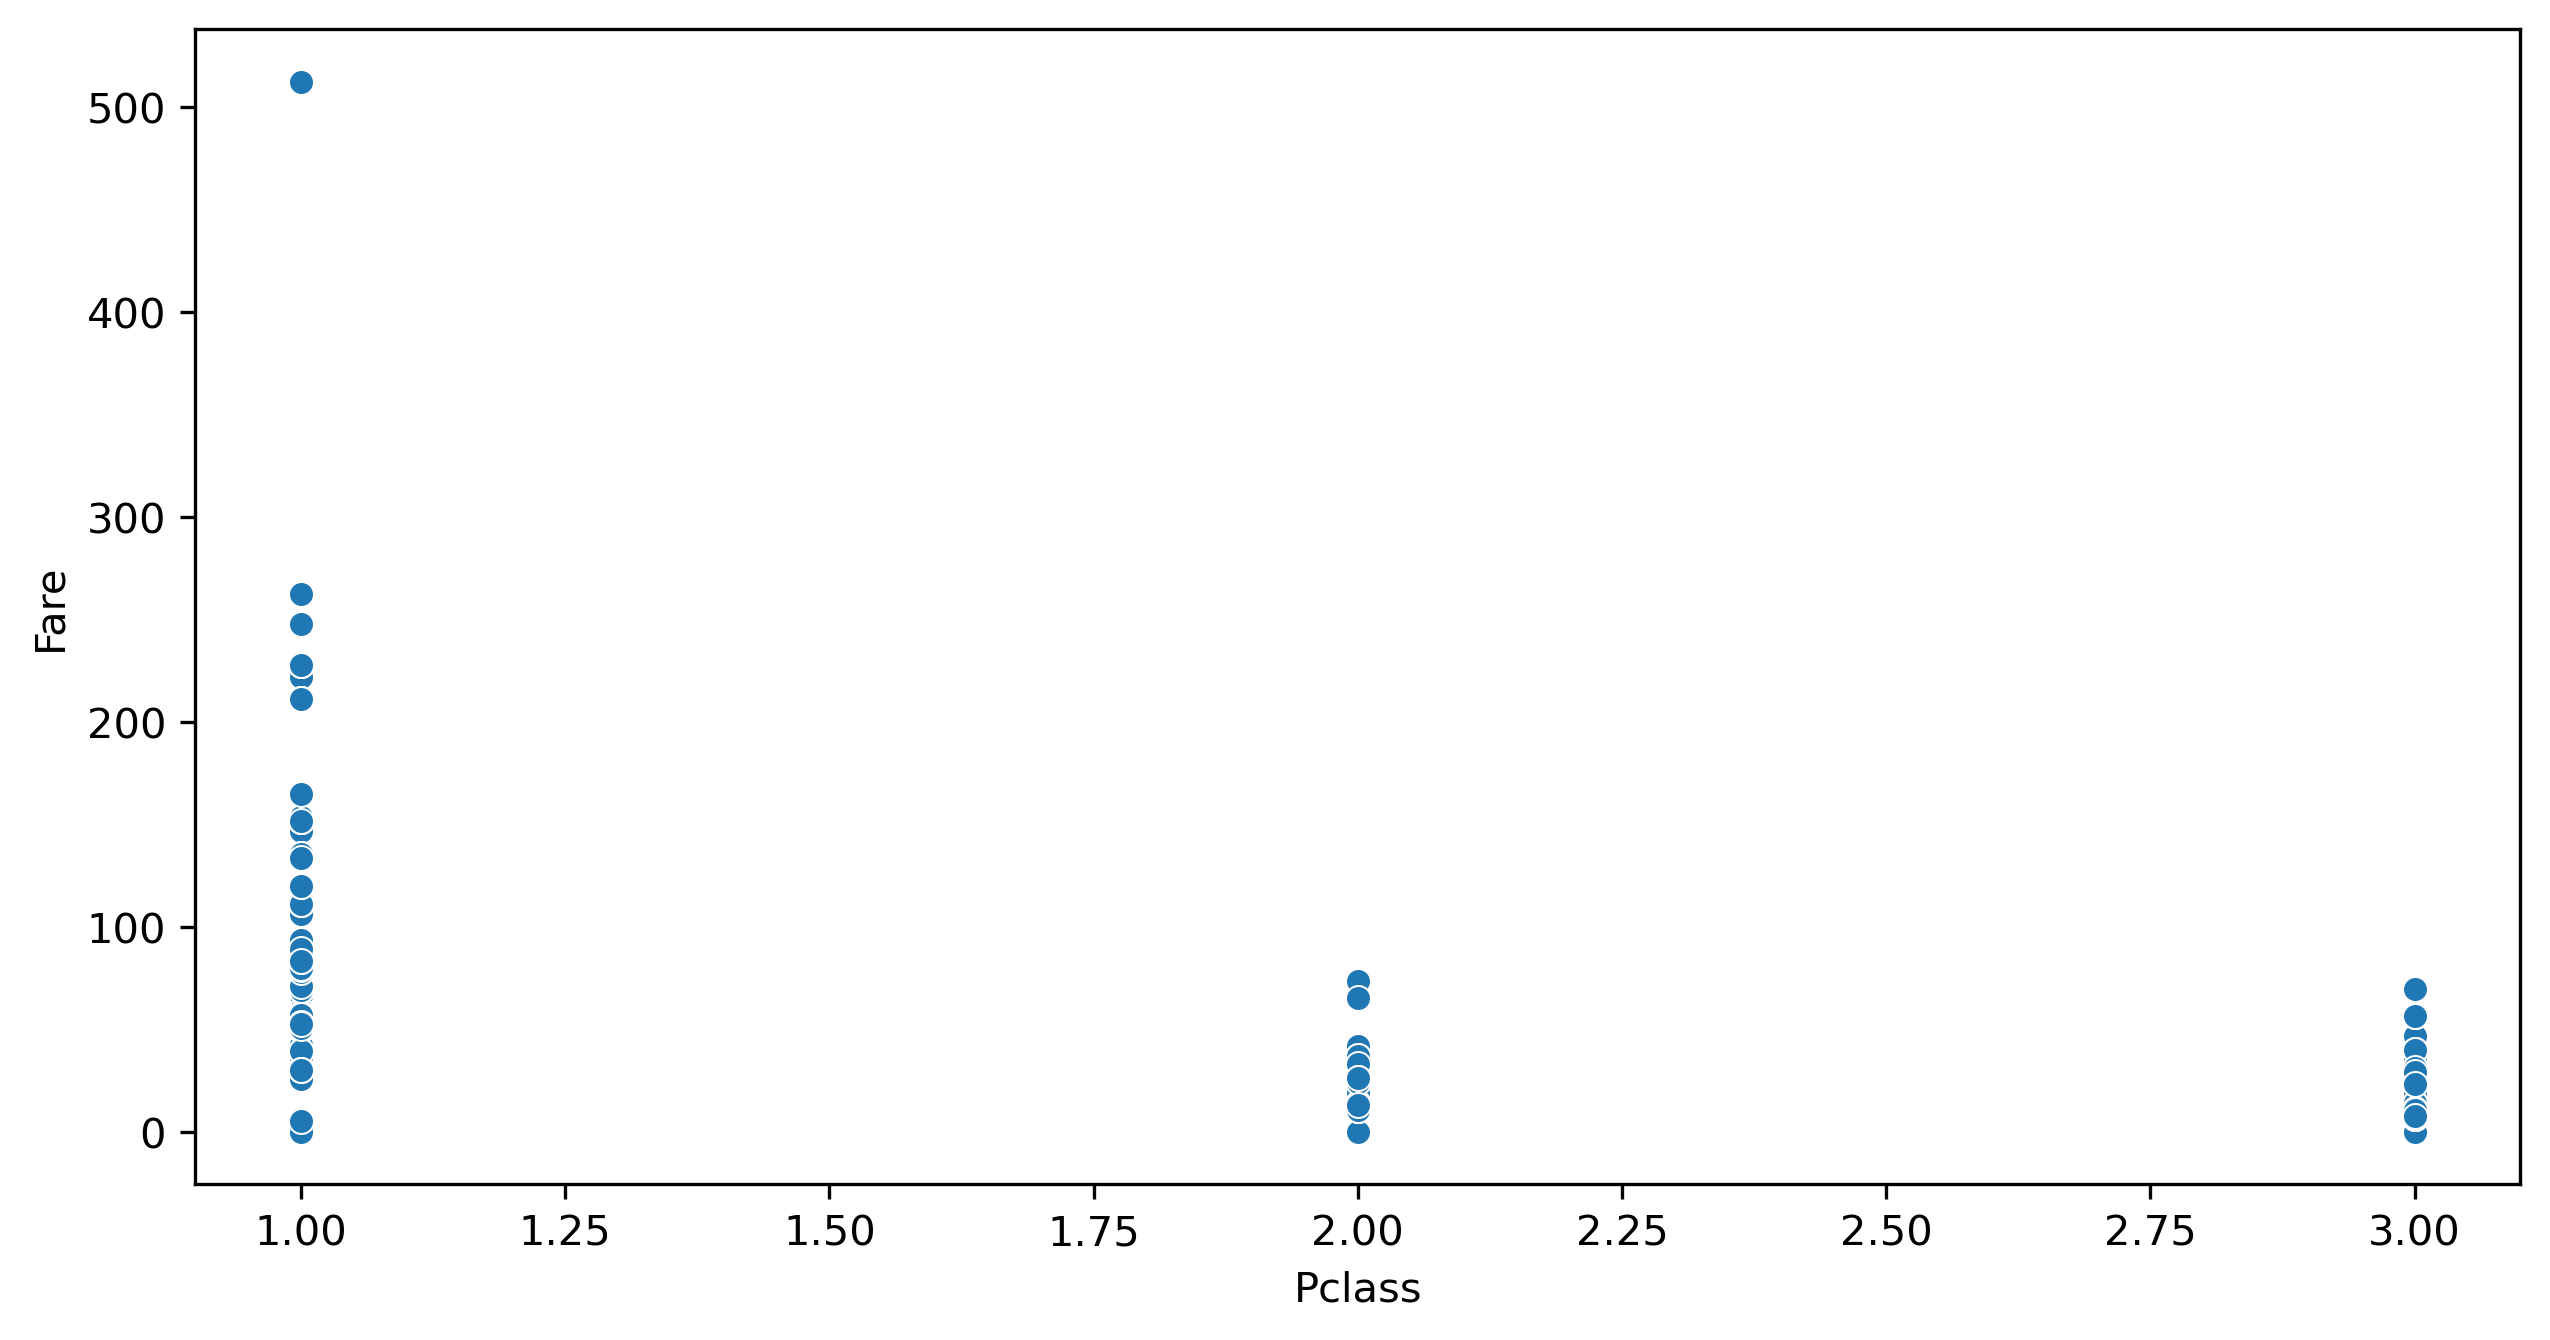

In [100]:
sns.scatterplot(x = titanic_train_data['Pclass'], y =titanic_train_data['Fare'])

<Axes: xlabel='Pclass', ylabel='Fare'>

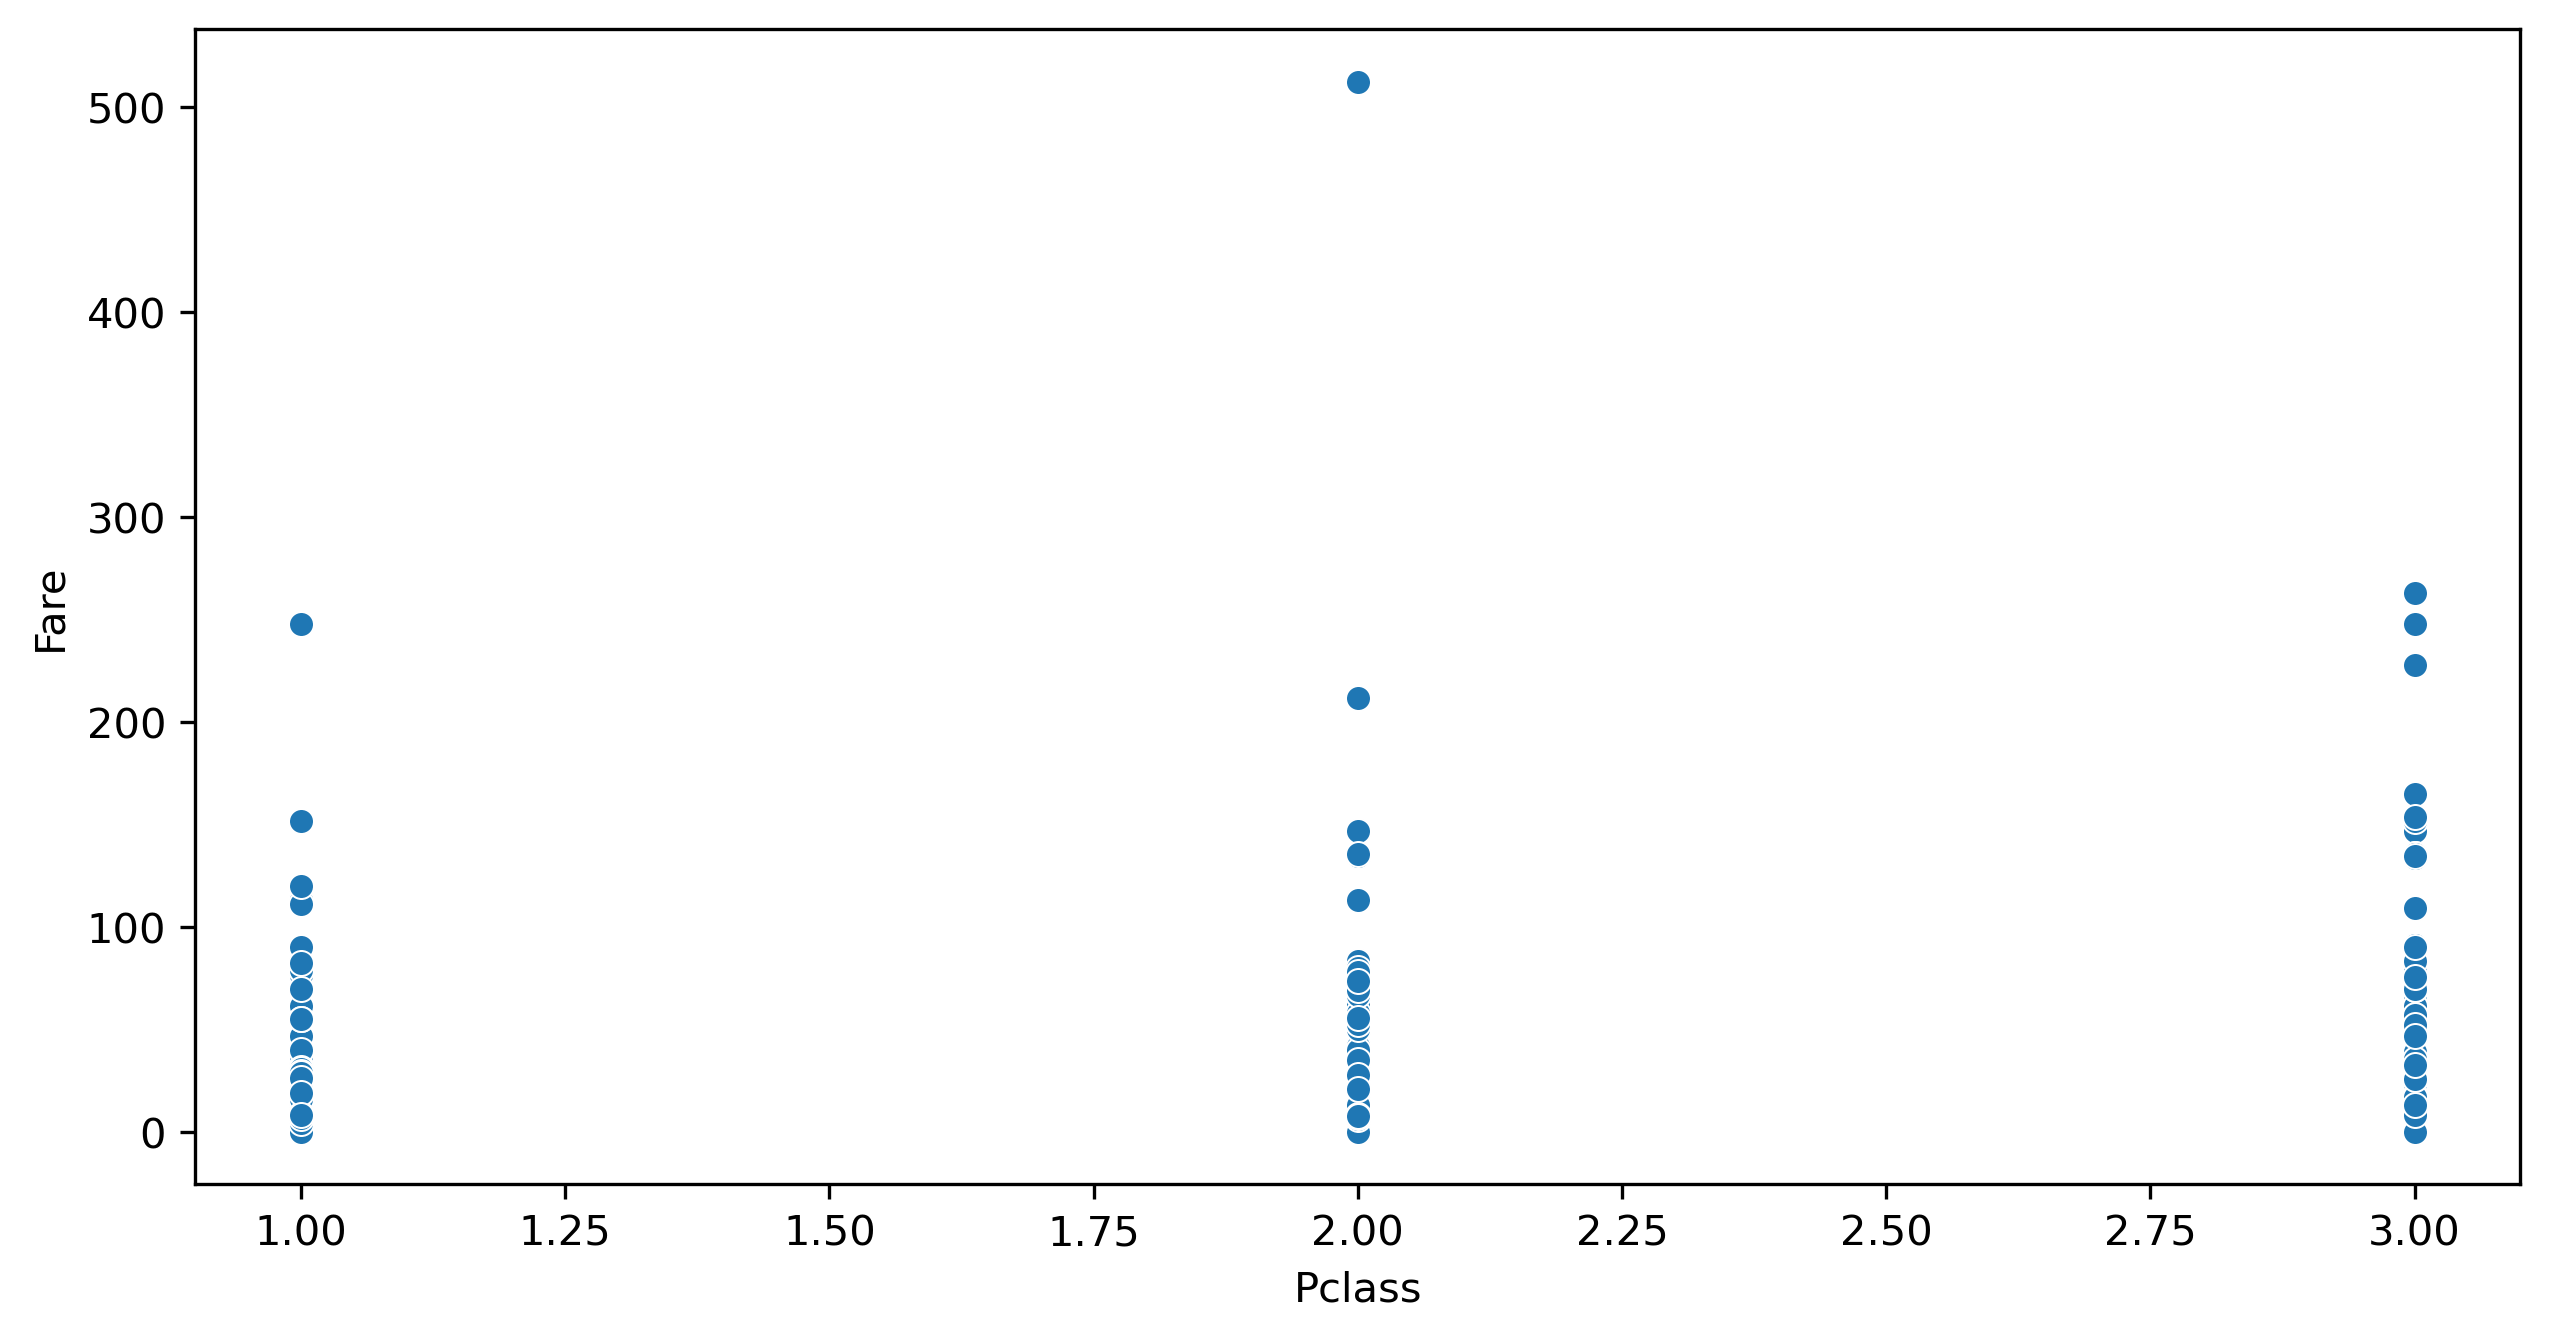

In [102]:
sns.scatterplot(x = titanic_test_data['Pclass'], y =titanic_train_data['Fare'])

<Axes: xlabel='Pclass', ylabel='Age'>

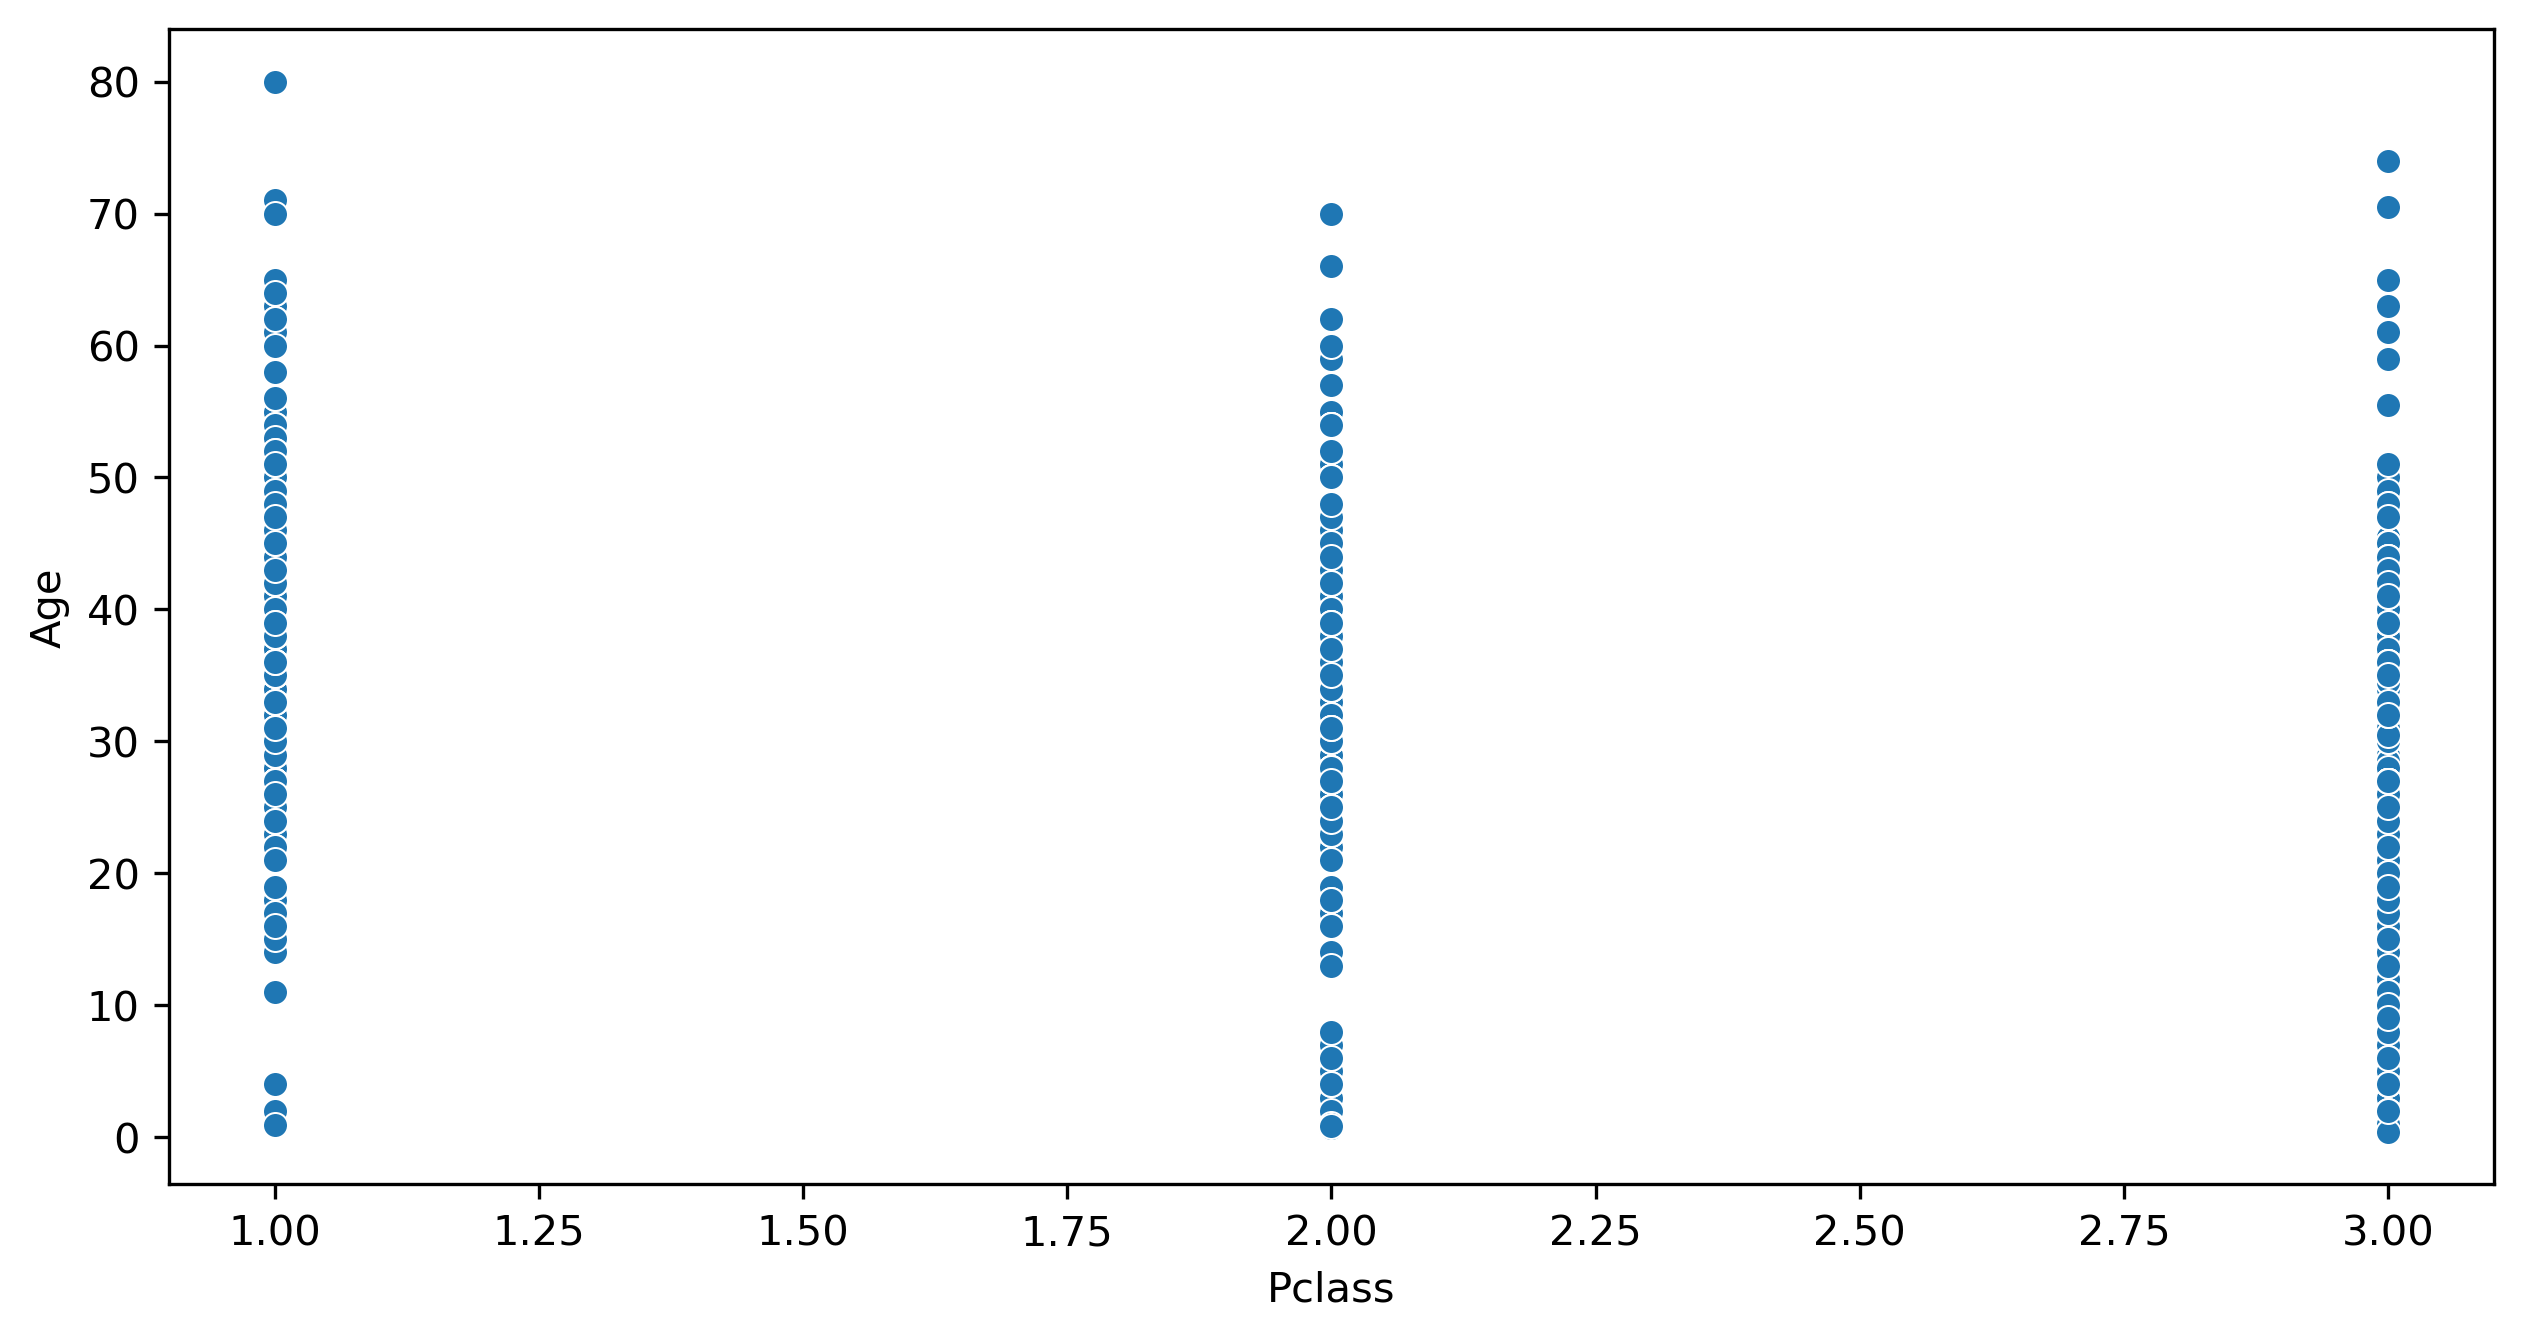

In [103]:
sns.scatterplot(x = titanic_train_data['Pclass'], y =titanic_train_data['Age'])

<Axes: xlabel='Pclass', ylabel='Age'>

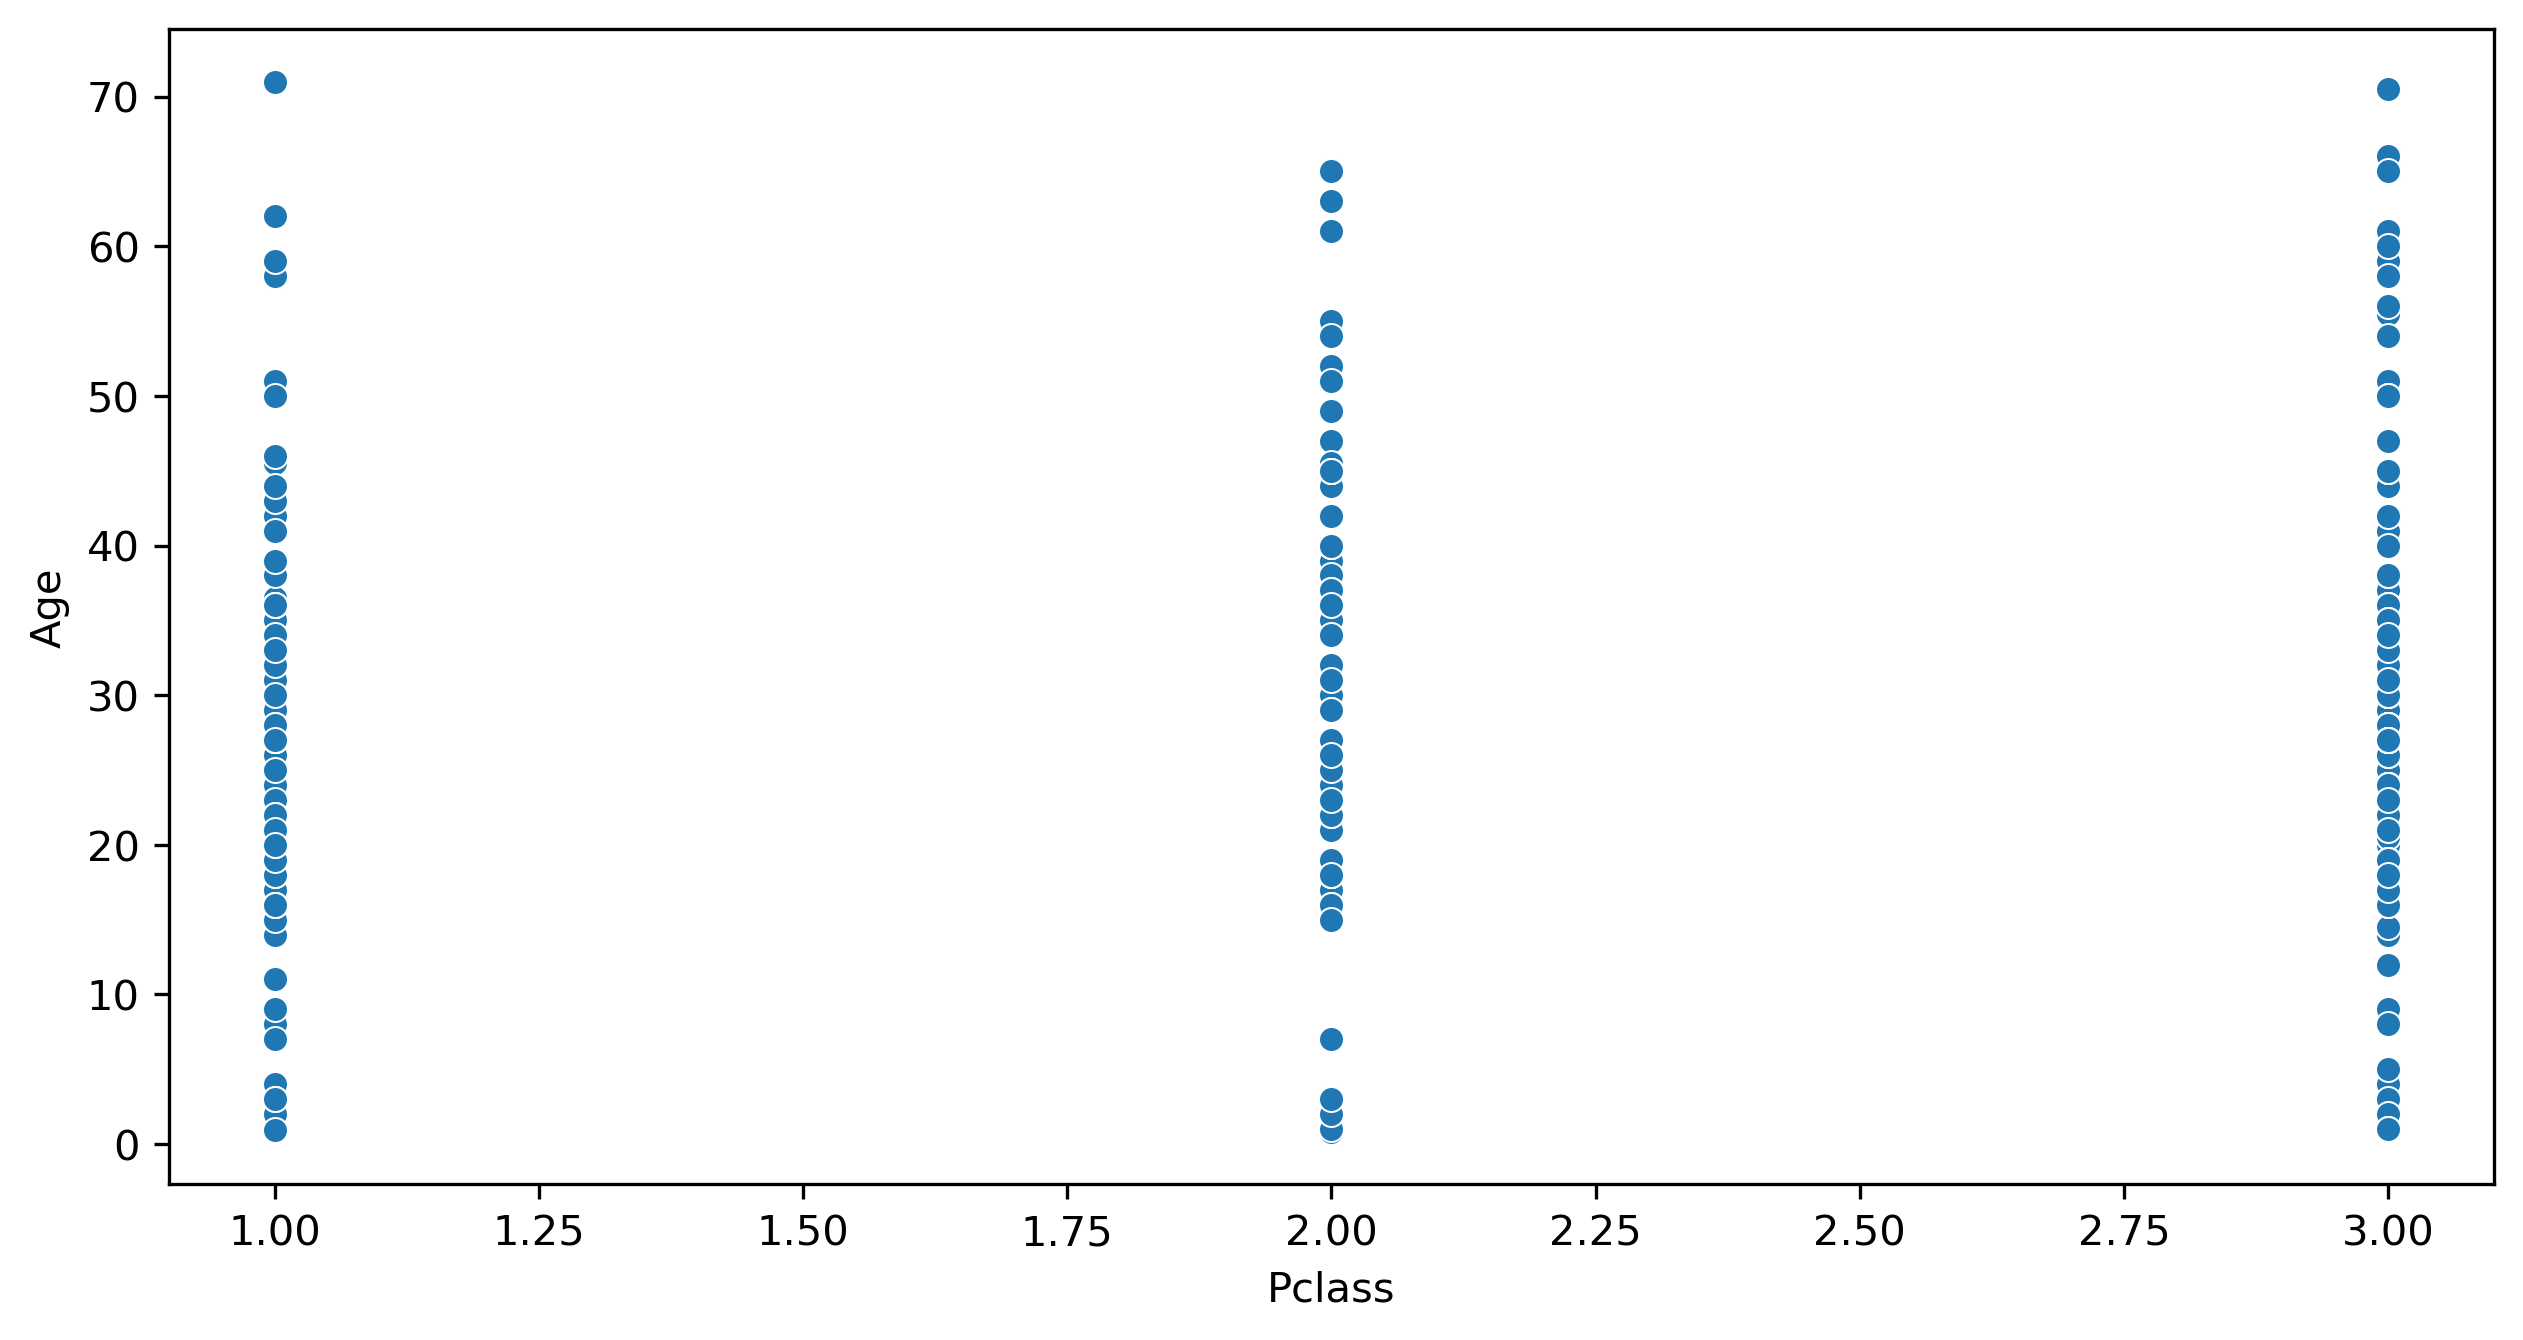

In [106]:
sns.scatterplot(x = titanic_test_data['Pclass'], y =titanic_train_data['Age'])

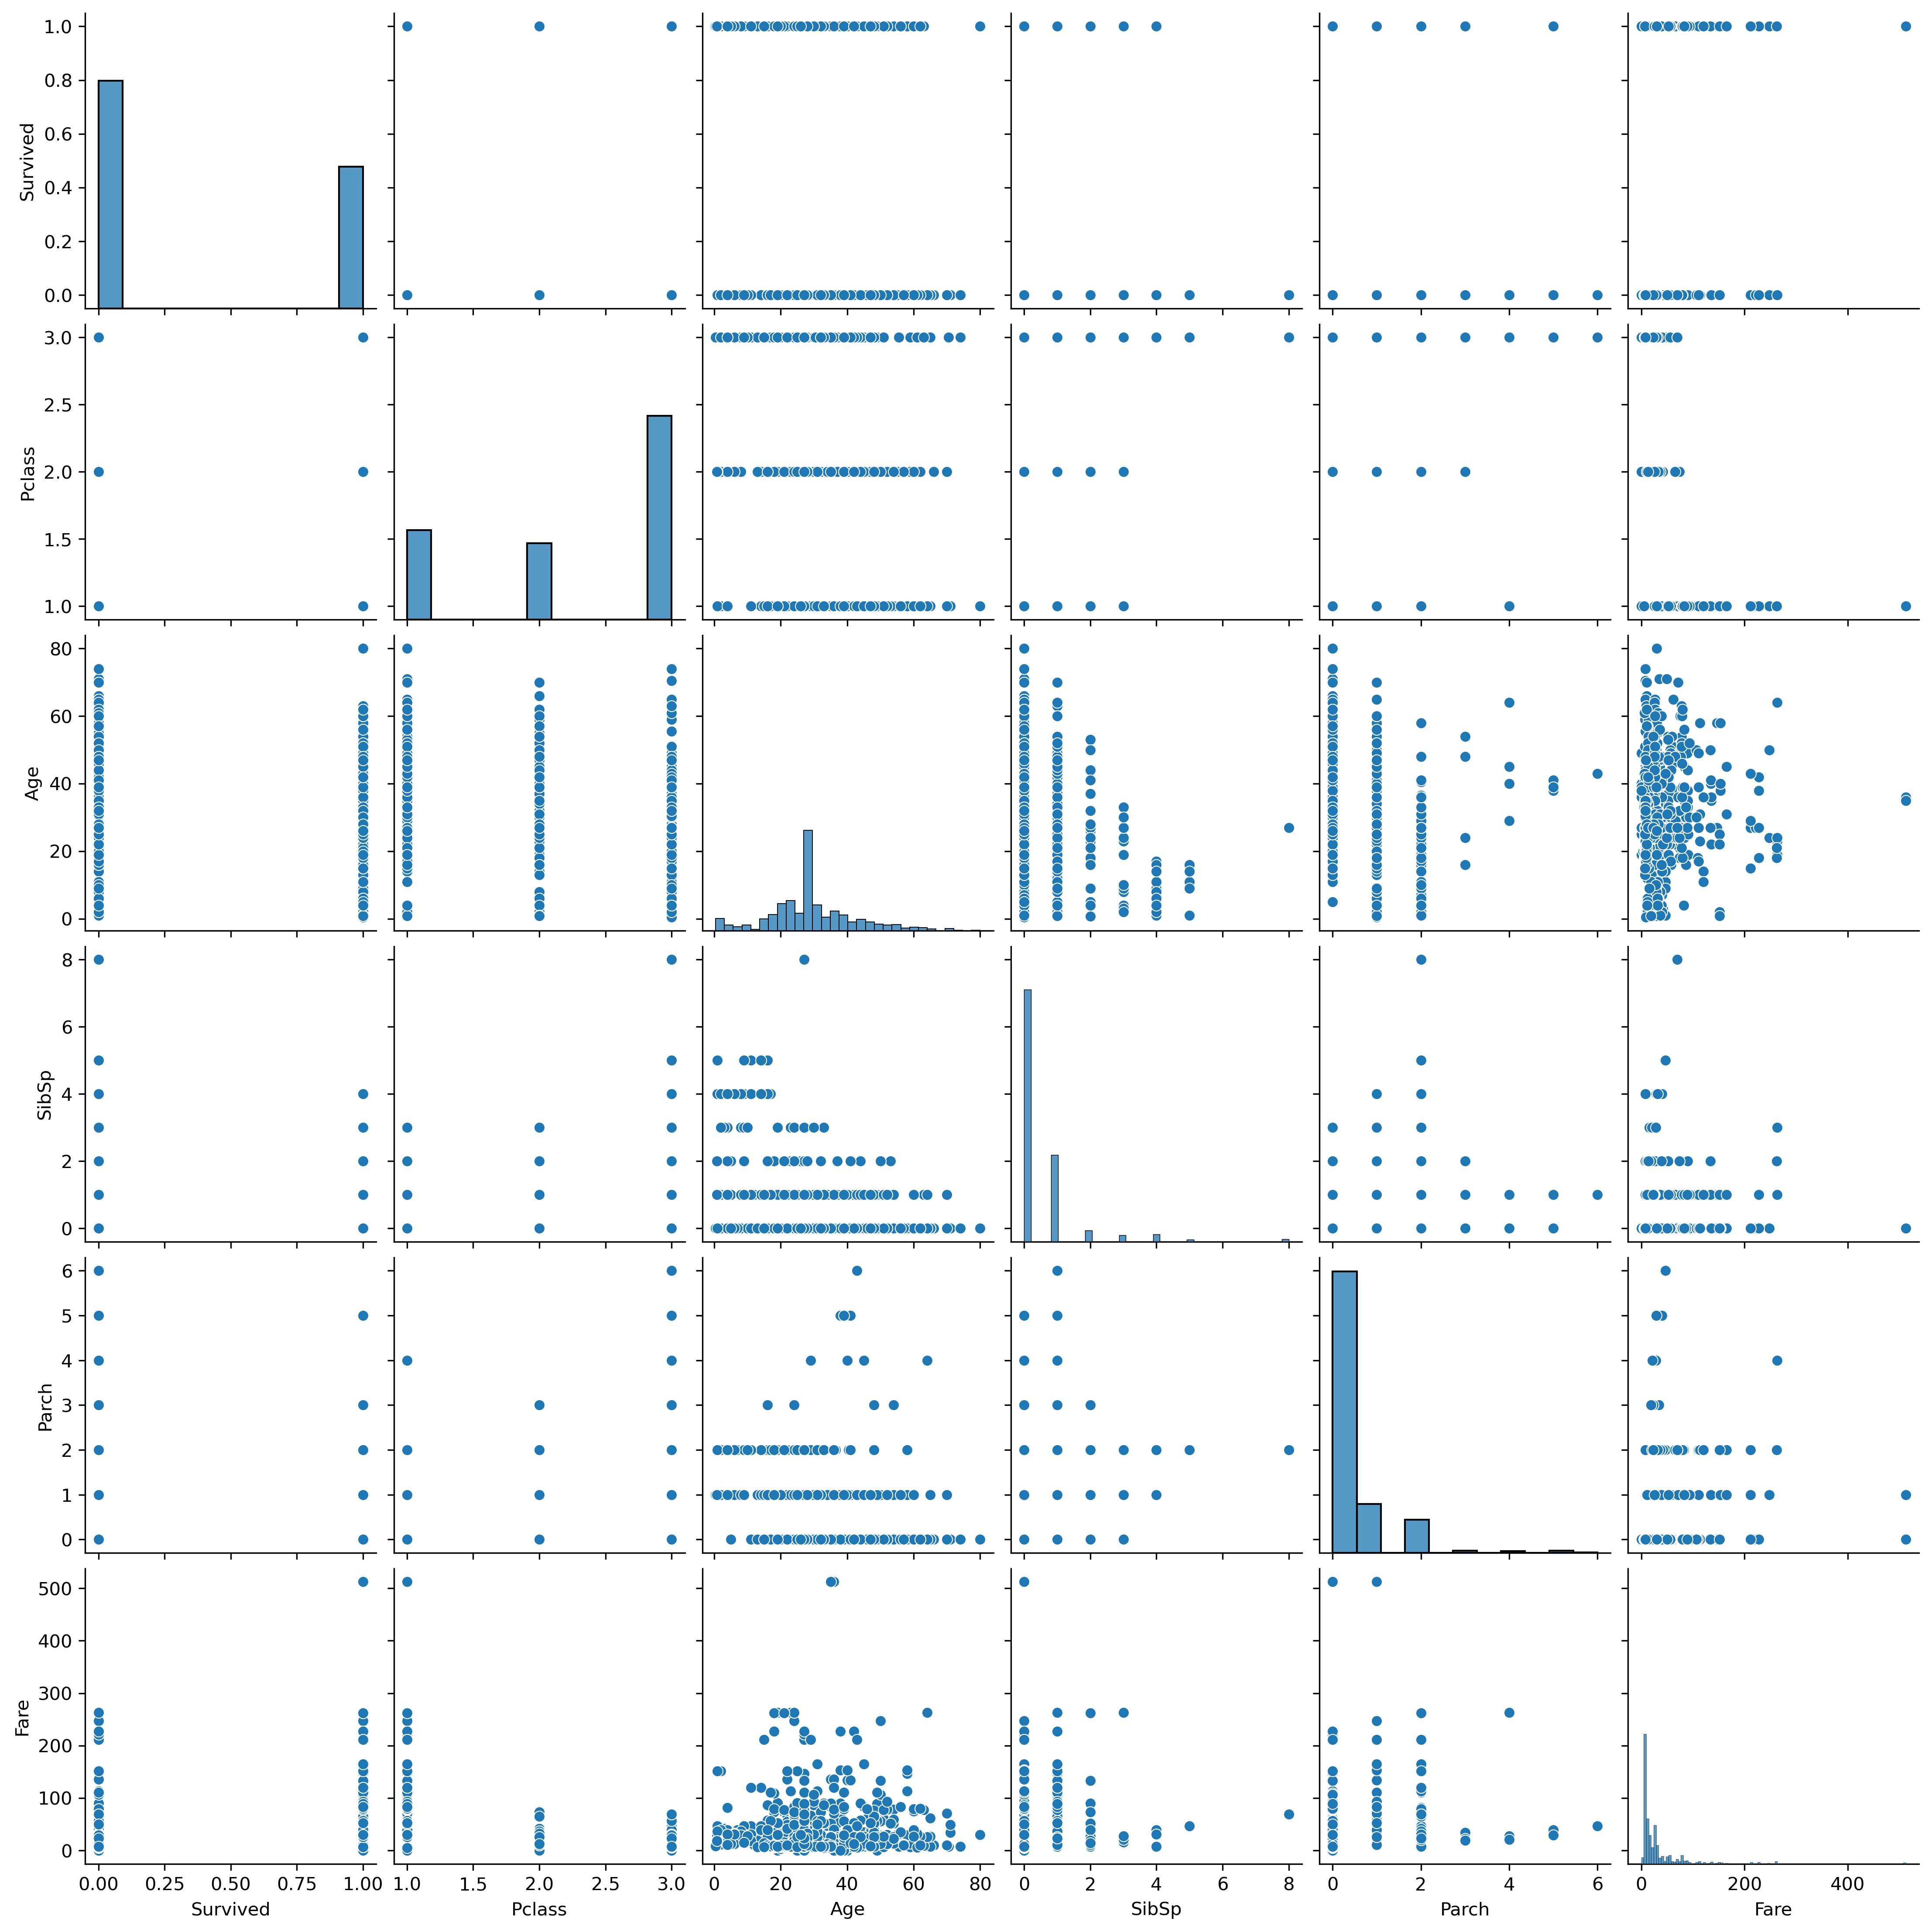

In [108]:
sns.pairplot(titanic_train_data)

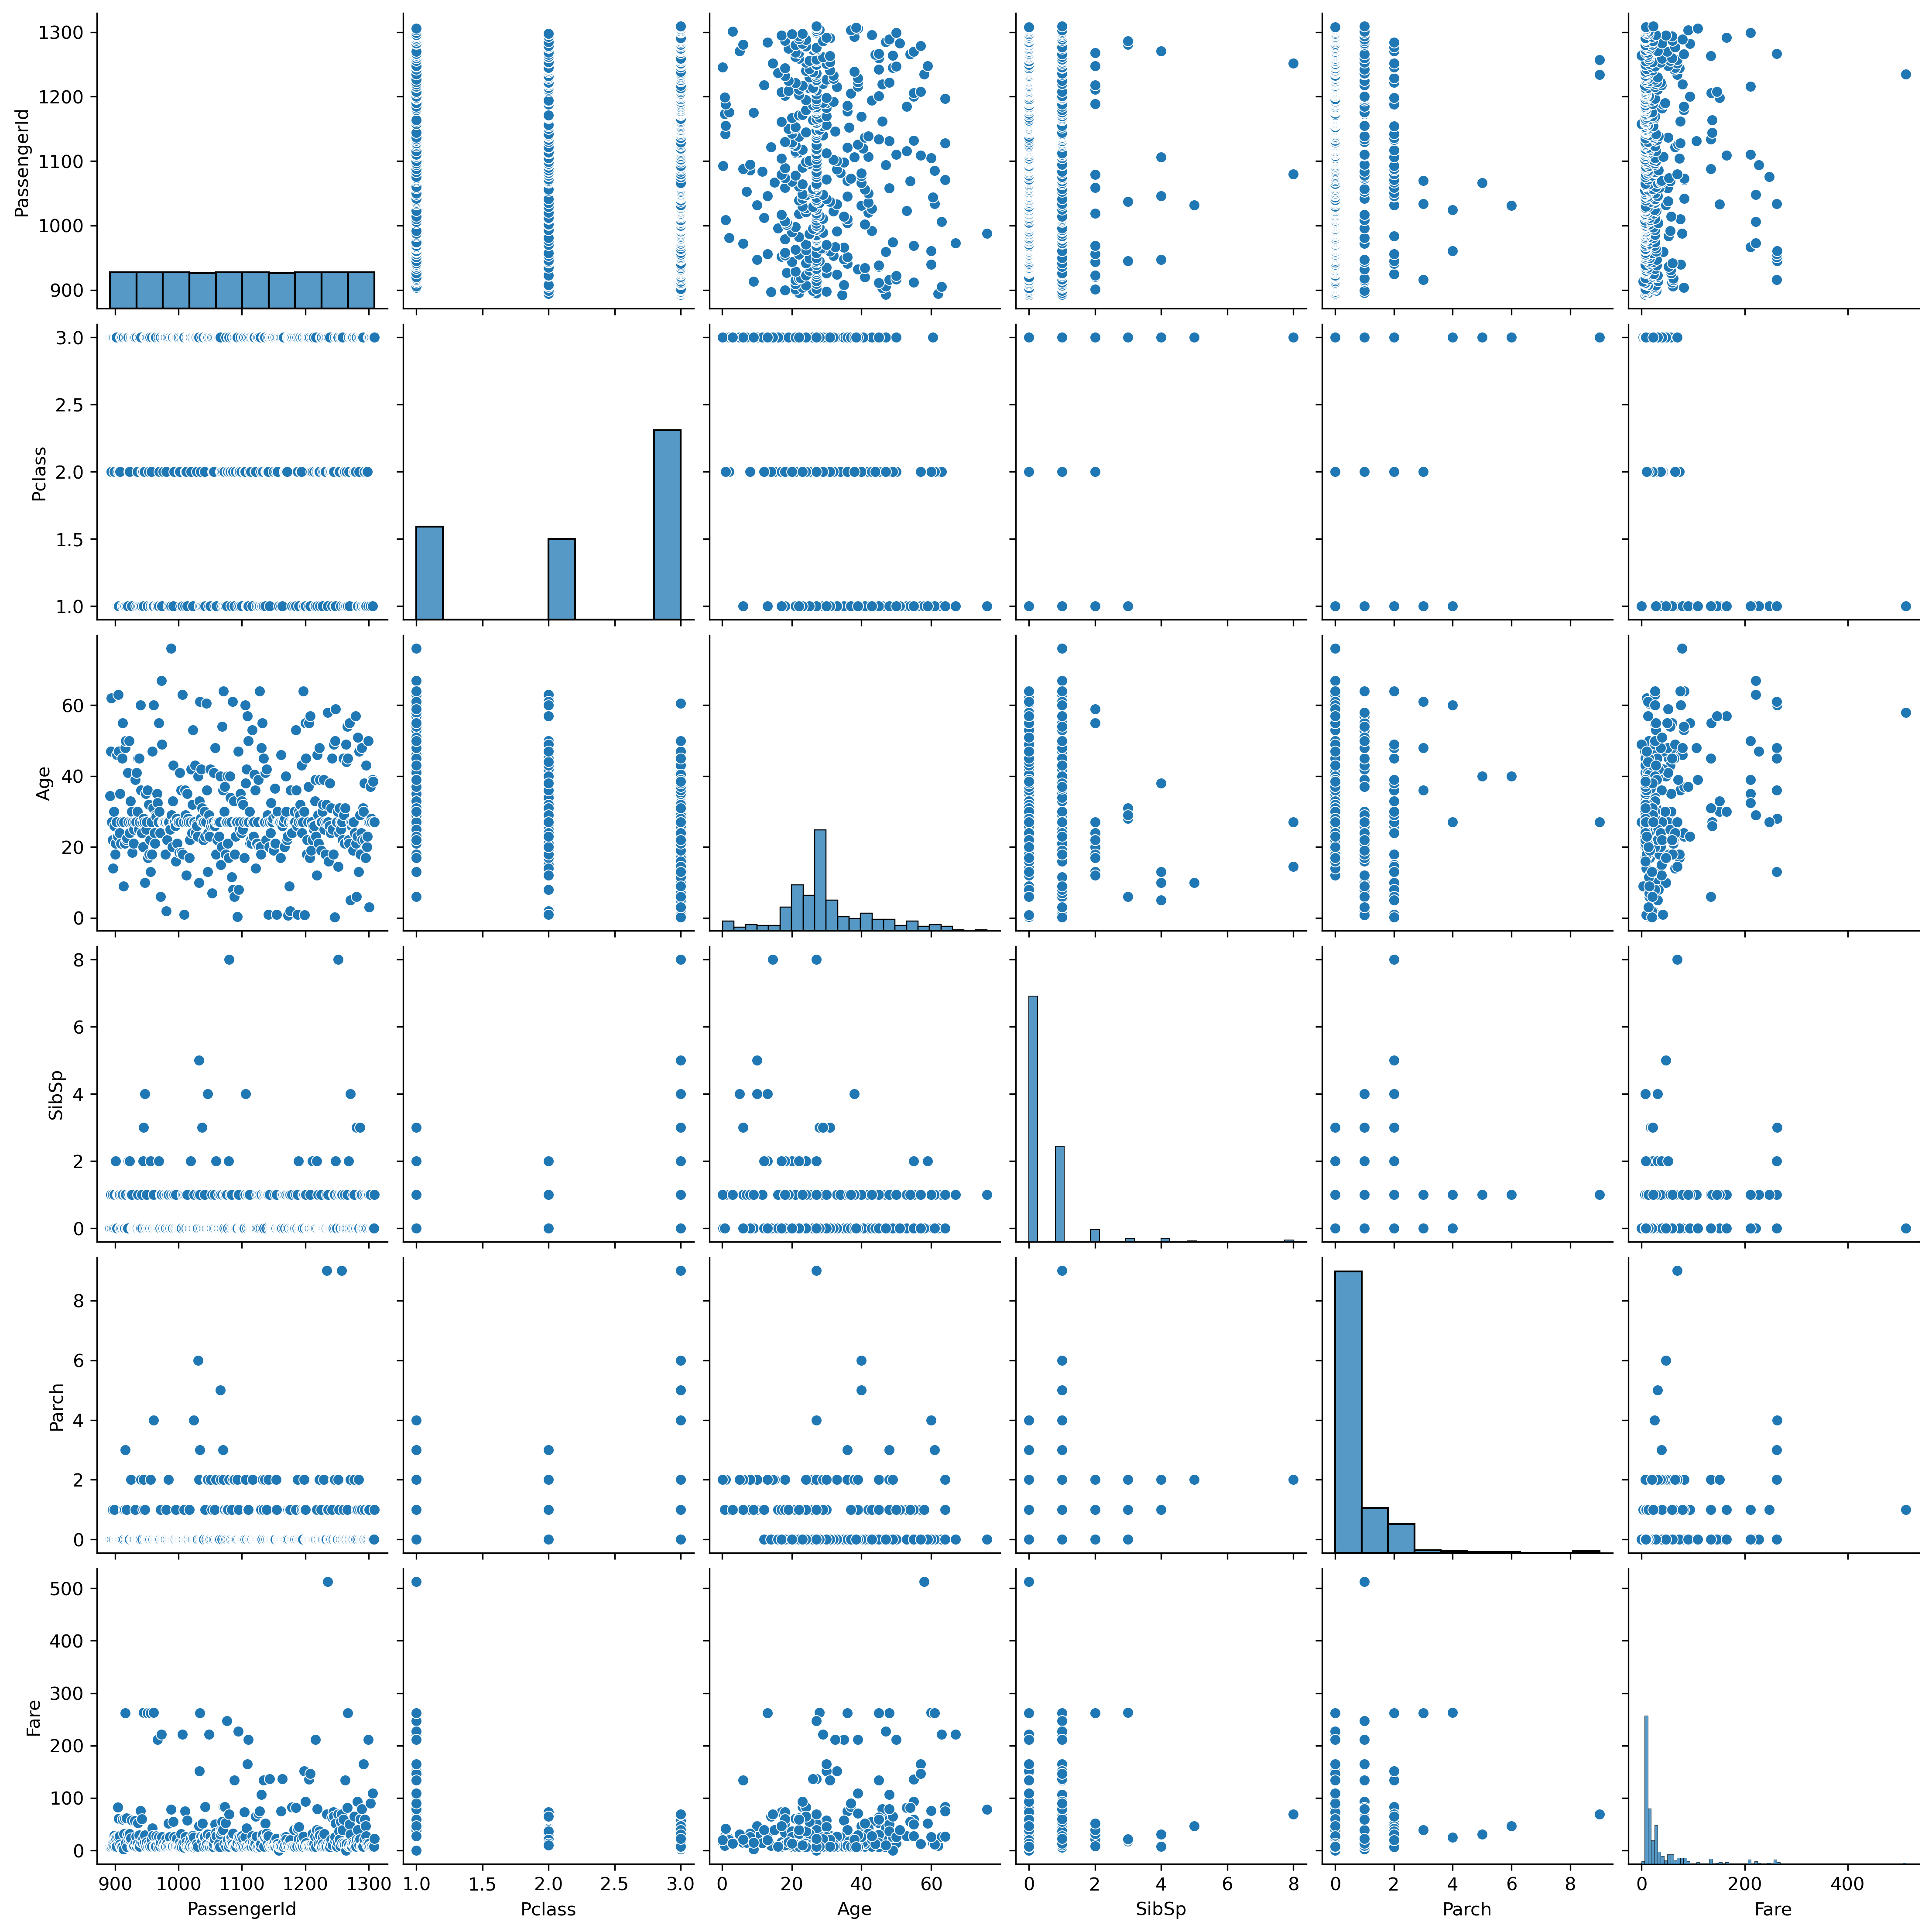

In [109]:
sns.pairplot(titanic_test_data)

In [110]:
#Correlation coefficient
import warnings
warnings.filterwarnings('ignore')
titanic_train_data.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.061956,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.344489,0.083081,0.018443,-0.549500
Age,-0.061956,-0.344489,1.000000,-0.233396,-0.168329,0.099571
SibSp,-0.035322,0.083081,-0.233396,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.168329,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.099571,0.159651,0.216225,1.000000


In [111]:
import warnings
warnings.filterwarnings('ignore')
titanic_test_data.corr(numeric_only=True)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.031447,0.003818,0.043080,0.008633
Pclass,-0.026751,1.000000,-0.467853,0.001087,0.018721,-0.577313
Age,-0.031447,-0.467853,1.000000,-0.071197,-0.043731,0.342357
SibSp,0.003818,0.001087,-0.071197,1.000000,0.306895,0.171912
Parch,0.043080,0.018721,-0.043731,0.306895,1.000000,0.230325
Fare,0.008633,-0.577313,0.342357,0.171912,0.230325,1.000000


<Axes: >

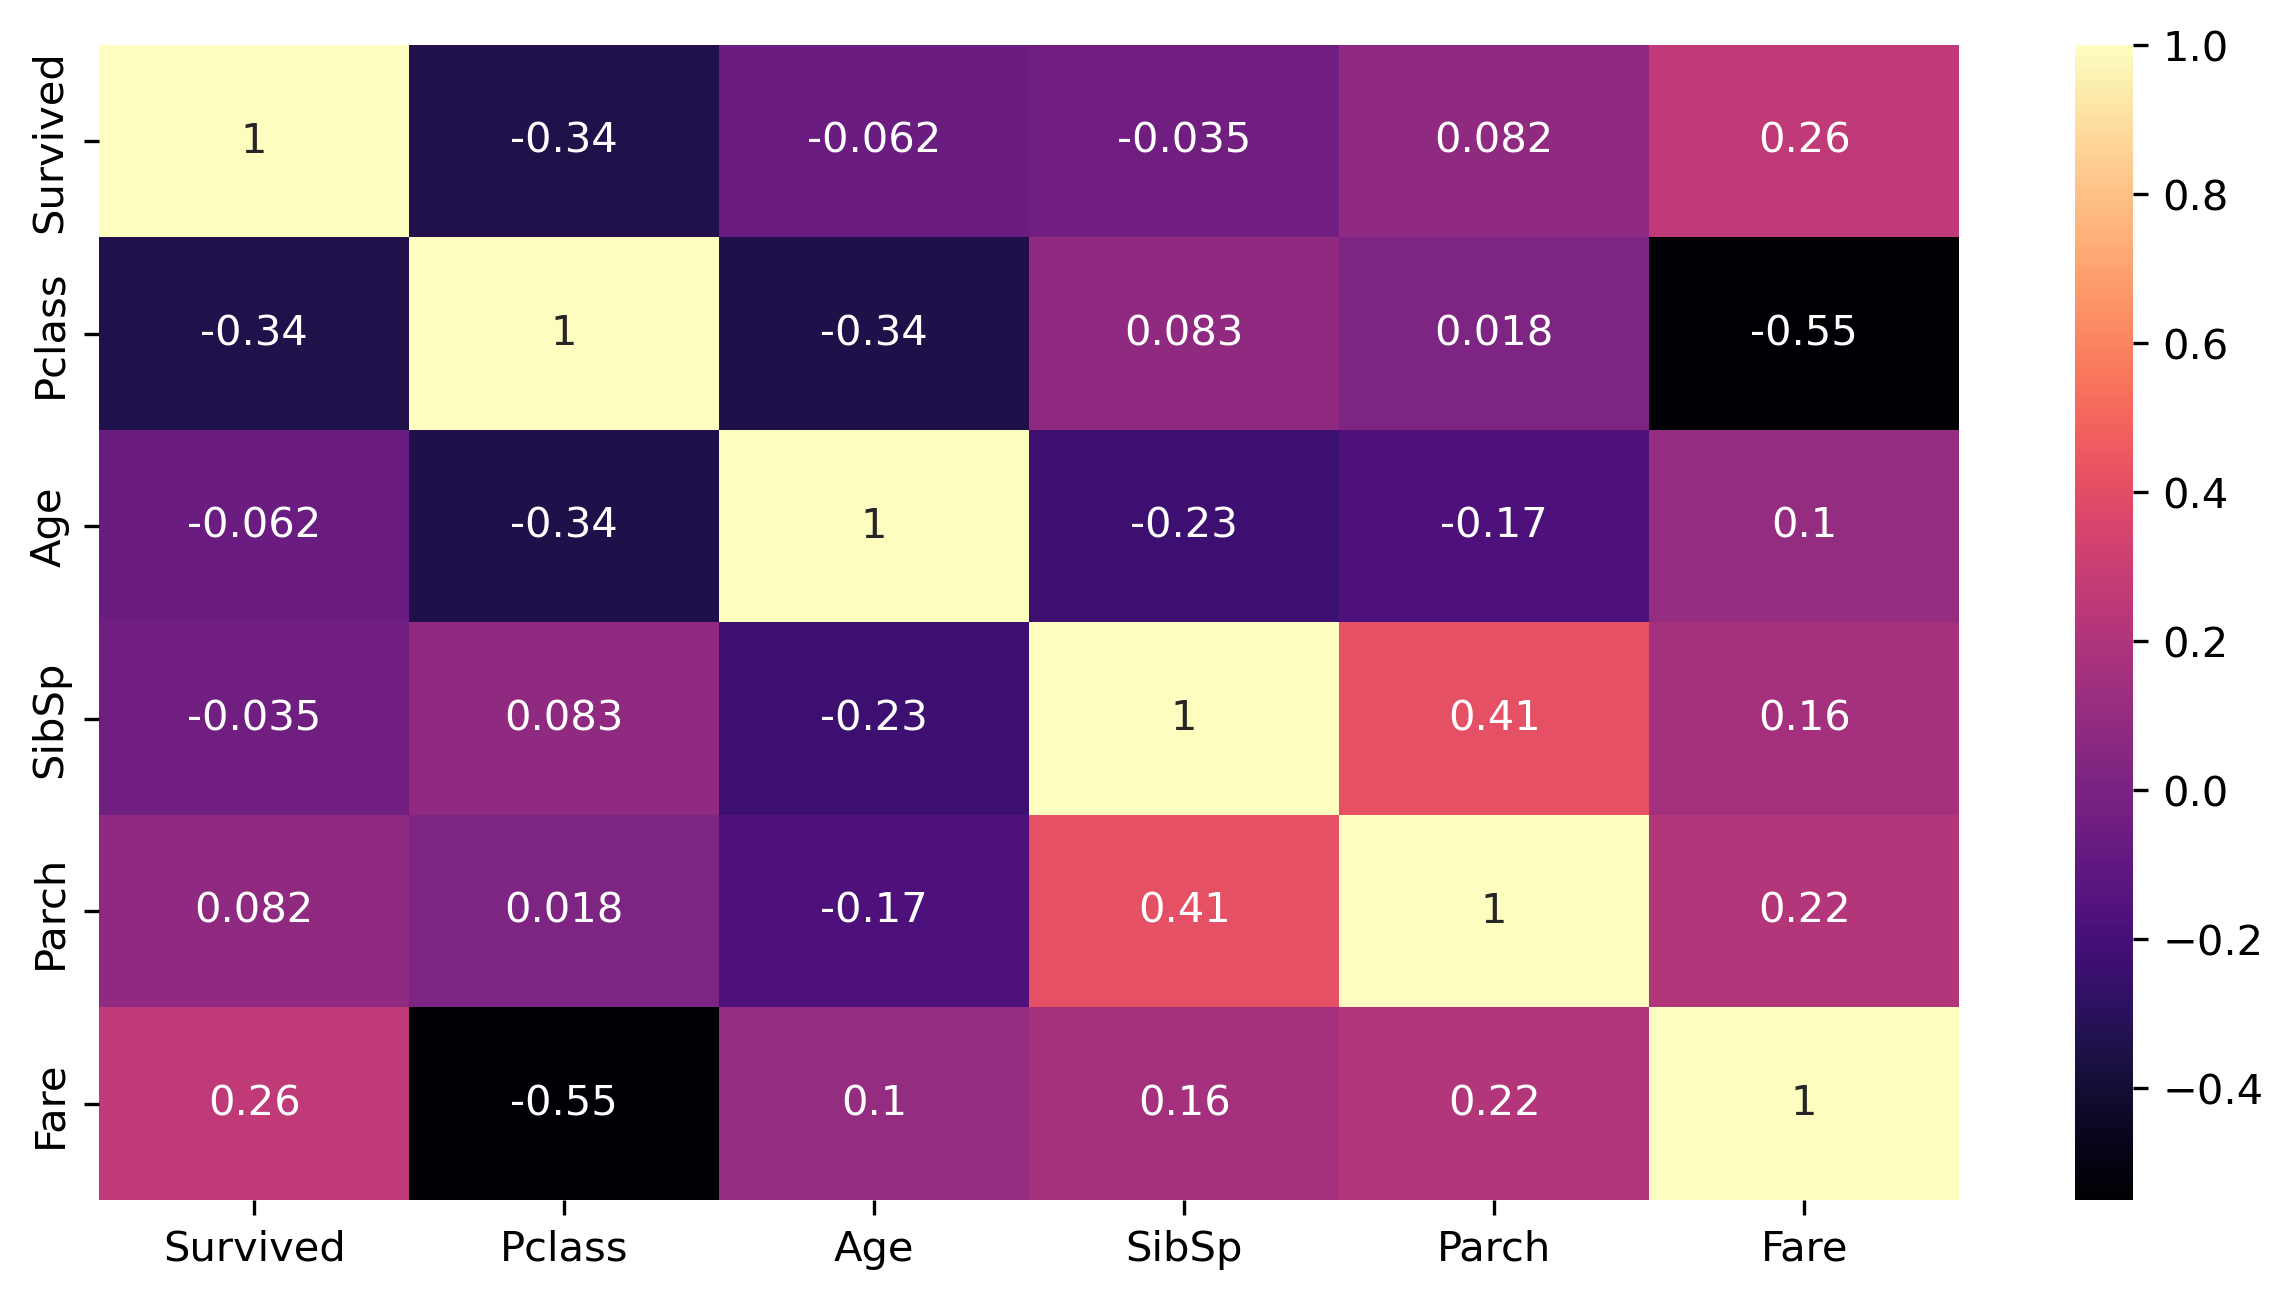

In [112]:
sns.heatmap(titanic_train_data.corr(numeric_only=True), annot=True, cmap='magma')

<Axes: >

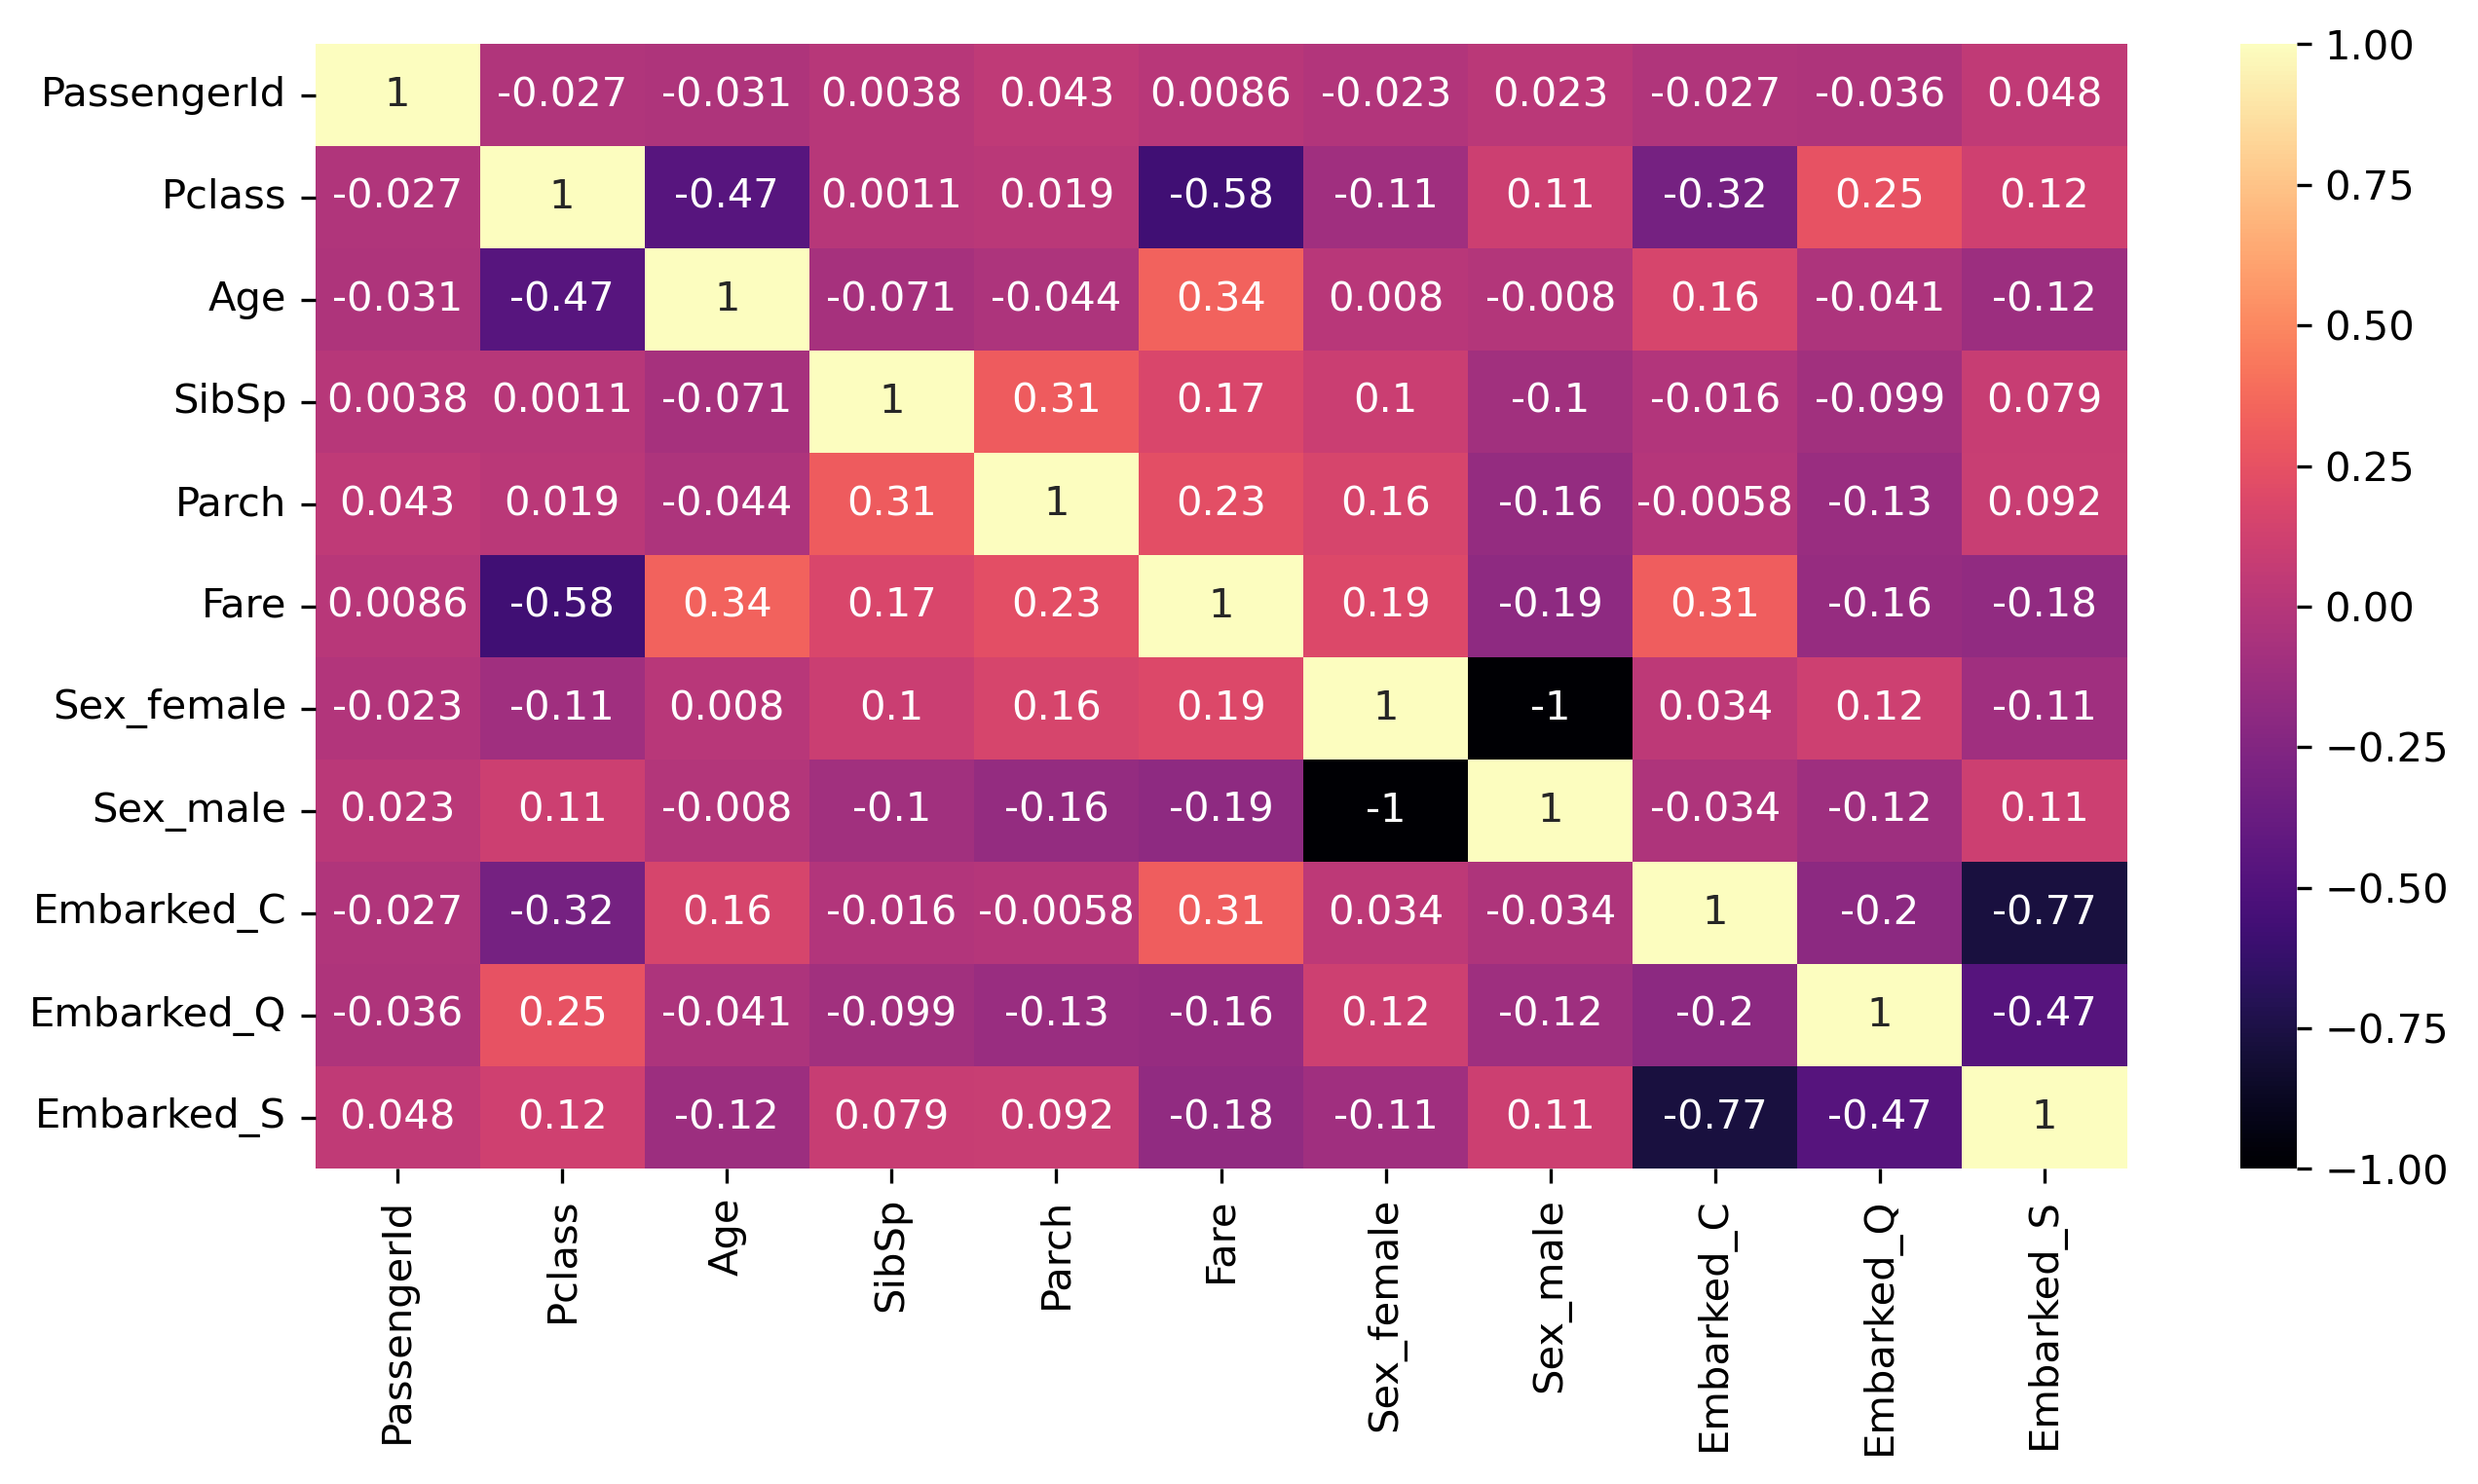

In [164]:
sns.heatmap(titanic_test_data.corr(numeric_only=True), annot=True, cmap='magma')

In [114]:
titanic_train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,27.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [115]:
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892.0,3.0,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894.0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895.0,3.0,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305.0,3.0,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306.0,1.0,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307.0,3.0,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308.0,3.0,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S


In [116]:
#Data preprocessing
##Encoding using pandas dummy function.
titanic_train_data=pd.get_dummies(data=titanic_train_data, columns= ['Sex','Embarked'])
titanic_train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,True,False,False,True
887,1,1,19.0,0,0,30.0000,True,False,False,False,True
888,0,3,27.0,1,2,23.4500,True,False,False,False,True
889,1,1,26.0,0,0,30.0000,False,True,True,False,False


In [117]:
titanic_test_data=pd.get_dummies(data=titanic_test_data, columns= ['Sex','Embarked'])
titanic_test_data

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892.0,3.0,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,False,True,False,True,False
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,True,False,False,False,True
2,894.0,2.0,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,False,True,False,True,False
3,895.0,3.0,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,False,True,False,False,True
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305.0,3.0,"Spector, Mr. Woolf",27.0,0,0,A.5. 3236,8.0500,NaN,False,True,False,False,True
414,1306.0,1.0,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,True,False,True,False,False
415,1307.0,3.0,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,False,True,False,False,True
416,1308.0,3.0,"Ware, Mr. Frederick",27.0,0,0,359309,8.0500,NaN,False,True,False,False,True


In [118]:
titanic_train_data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [119]:
titanic_test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [120]:
#3. Model Building:
#a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
#b. Train the model using the training data.
#Define x and y
titanic_train_data.head(4)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True


In [121]:
x =titanic_train_data .iloc[:,1:]
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,False,True,False,False,True
887,1,19.0,0,0,30.0000,True,False,False,False,True
888,3,27.0,1,2,23.4500,True,False,False,False,True
889,1,26.0,0,0,30.0000,False,True,True,False,False


In [122]:
y = titanic_train_data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [124]:
#Split the data.
from sklearn.model_selection import train_test_split
train_test_split(x,y,train_size=0.8)

[     Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
 237       2   8.0      0      2  26.2500        True     False       False   
 119       3   2.0      4      2  31.2750        True     False       False   
 613       3  27.0      0      0   7.7500       False      True       False   
 740       1  27.0      0      0  30.0000       False      True       False   
 259       2  50.0      0      1  26.0000        True     False       False   
 ..      ...   ...    ...    ...      ...         ...       ...         ...   
 12        3  20.0      0      0   8.0500       False      True       False   
 556       1  48.0      1      0  39.6000        True     False        True   
 506       2  33.0      0      2  26.0000        True     False       False   
 452       1  30.0      0      0  27.7500       False      True        True   
 688       3  18.0      0      0   7.7958       False      True       False   
 
      Embarked_Q  Embarked_S  
 237       False   

In [125]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
lg = LogisticRegression() 
lg.fit(xtrain,ytrain) 

LogisticRegression()

In [128]:
ypred = lg.predict(xtest)
ypred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [129]:
print(ytest[:25].values) #Actual
print(ypred[:25]) #Predicted

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0]
[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0]


In [130]:
len(ypred)

179

In [131]:
#4. Model Evaluation:
#a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
from sklearn.metrics import confusion_matrix, classification_report ,roc_auc_score,roc_curve

In [132]:
confusion_matrix(ytest,ypred) #Sequence -> tn, fp, fn, tp

array([[90, 15],
       [21, 53]], dtype=int64)

<Axes: >

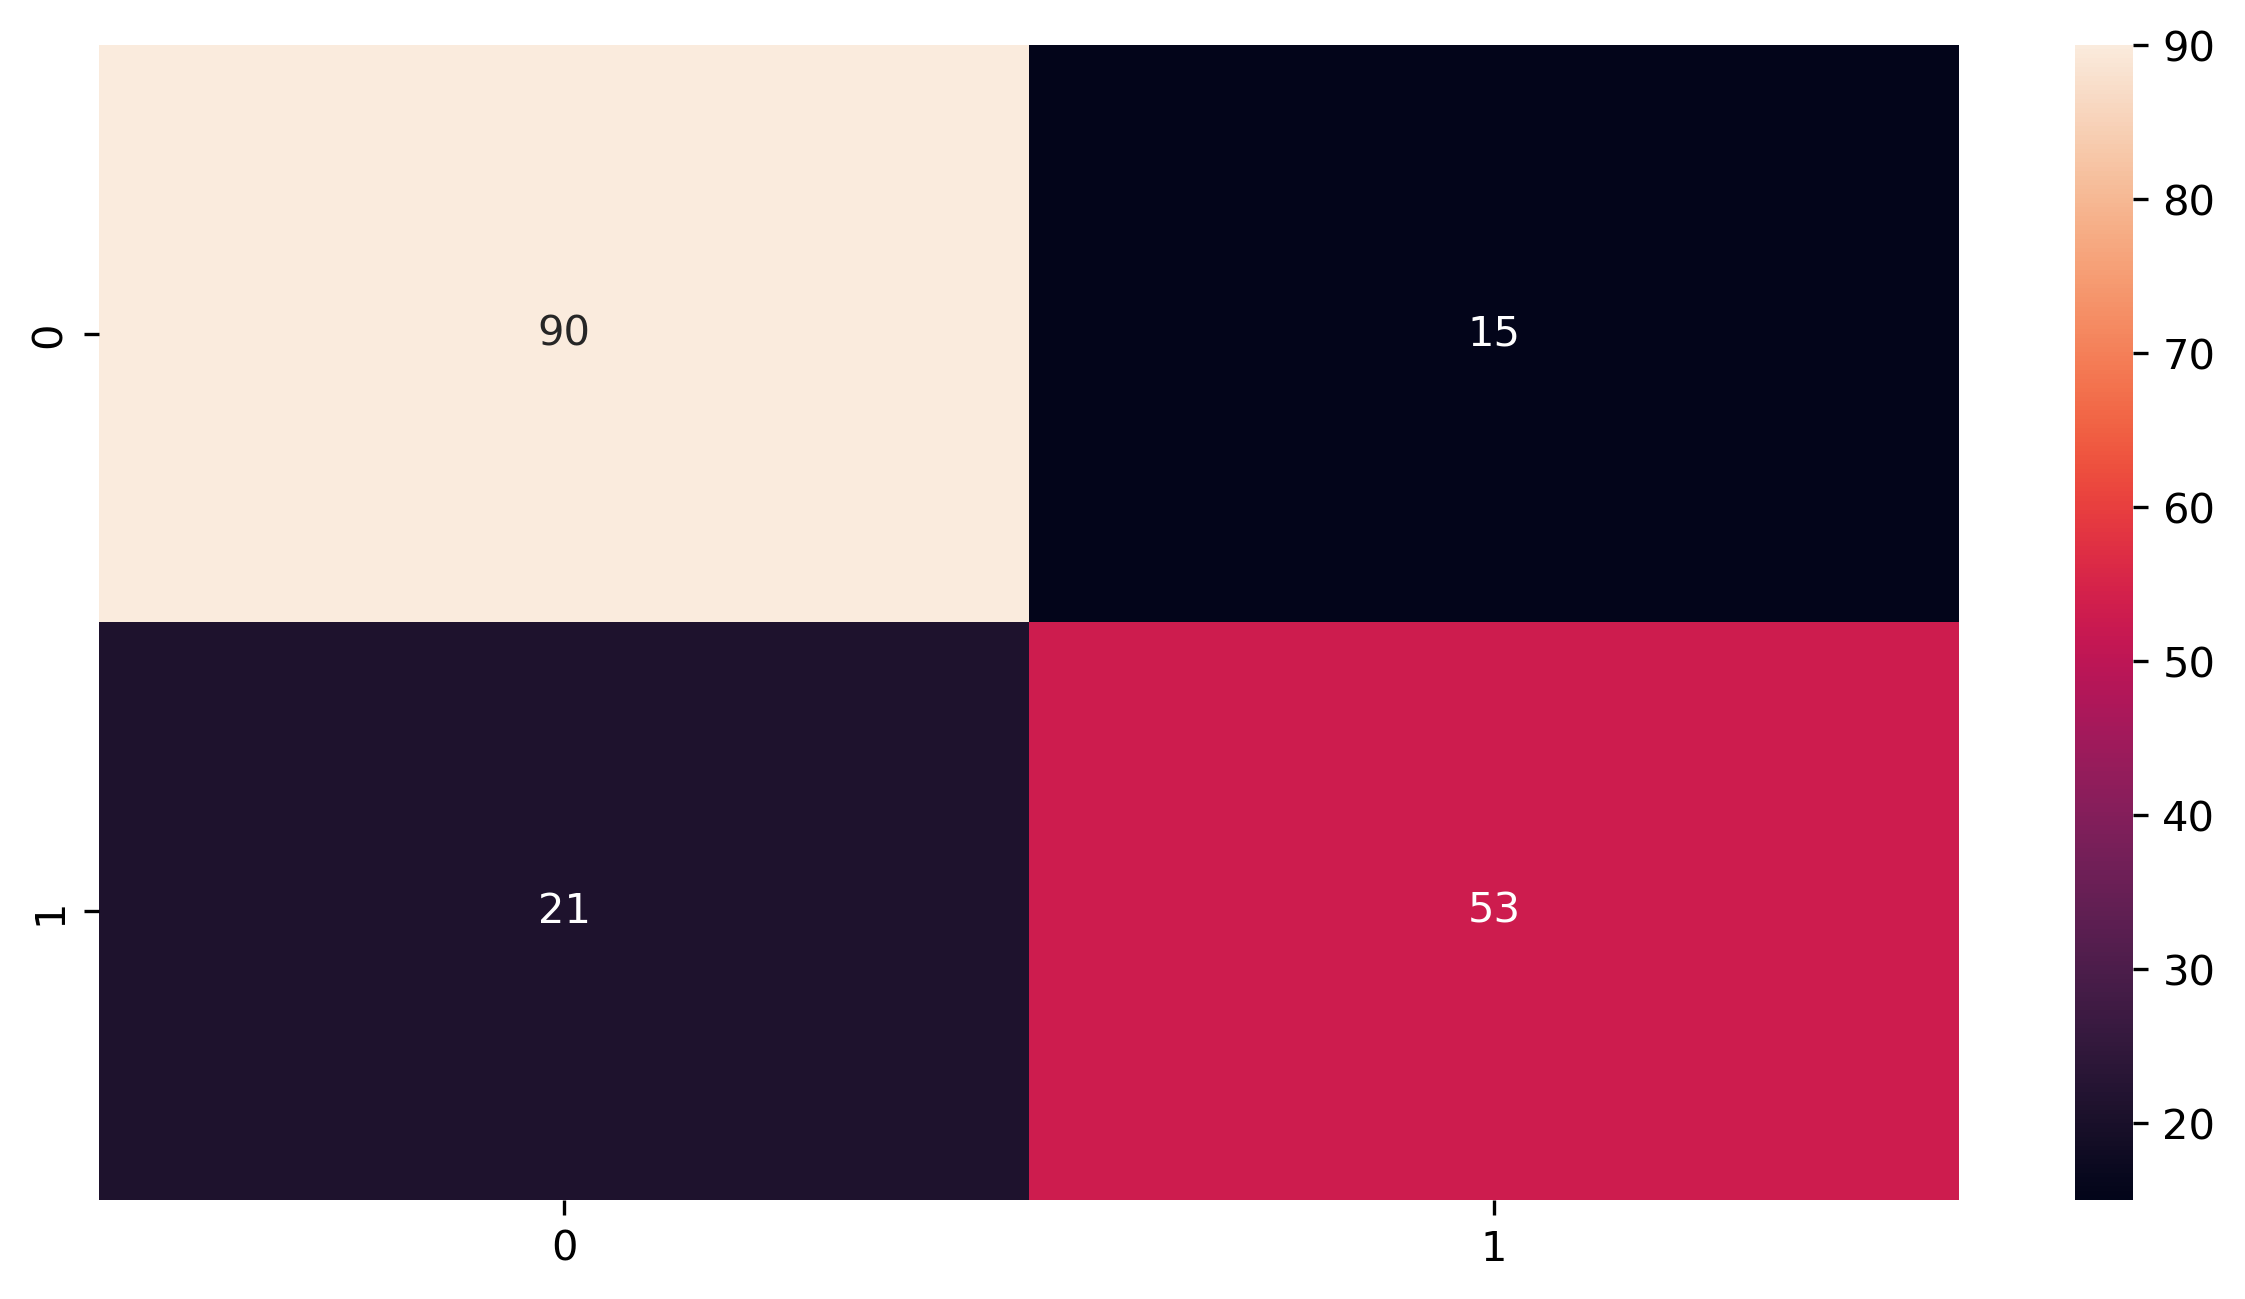

In [133]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True, fmt = 'g')

In [134]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [135]:
roc_auc=roc_auc_score(ytest,ypred)

In [140]:
print(f'ROC AUC :{roc_auc}')

ROC AUC :0.7866795366795367


In [ ]:
#Interview Questions (from the document)
#1. Difference between precision and recall: 
ans: precision 
In the simplest terms, Precision is the ratio between the True Positives and all the Positives. For our problem statement, that would be the measure of patients that we correctly identify as having a heart disease out of all the patients actually having it
Precision also gives us a measure of the relevant data points. It is important that we don’t start treating a patient who actually doesn’t have a heart ailment but our model predicted it as having it.
ans: recall
The recall is the measure of our model correctly identifying True Positives. Thus, for all the patients who actually have heart disease, recall tells us how many we correctly identified as having a heart disease.
